# plot N Omega potentials


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_style('ticks', {'axes.grid': True})
sns.set_context('poster', font_scale=2.0)
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
import pickle
import scipy.optimize
import scipy.constants

In [4]:
# use uncertainties library (pip install uncertaintes)
from uncertainties import ufloat

In [5]:
from tqdm import tqdm_notebook as tqdm

In [6]:
hbarc = (scipy.constants.hbar * scipy.constants.speed_of_light
         / scipy.constants.mega / scipy.constants.electron_volt / scipy.constants.femto)

ainv = 2.333e3
lat_unit = hbarc/ainv
momega = 1.71153e3/ainv
mn = 0.95469e3/ainv
mpi = 0.146e3/ainv
L = 96
bin_num = 20 # number of the jackknife sample

In [7]:
ls ../data

corr_jk_full_stat_20bins.pkl  n_omega_spin2_Rcorr_jk.pkl
n_omega_spin1_Rcorr_jk.pkl    n_omega_spin2_pot_av.pkl
n_omega_spin1_pot_av.pkl      n_omega_spin2_pot_jk.pkl
n_omega_spin1_pot_jk.pkl


import data

In [8]:
spin = 2
with open(f'../data/n_omega_spin{spin}_pot_av.pkl', 'rb') as fin:
    pot_av = pickle.load(fin)
with open(f'../data/n_omega_spin{spin}_pot_jk.pkl', 'rb') as fin:
    pot_jk = pickle.load(fin)

coordinate

In [9]:
rs = np.array([np.sqrt(ix**2 + iy**2 + iz**2)
              for iz in range(-L//2, L//2)
              for iy in range(-L//2, L//2)
              for ix in range(-L//2, L//2)]).reshape(L, L, L)
rs = np.roll(np.roll(np.roll(rs, L//2, 0), L//2, 1), L//2, 2).flatten()
uniq_a1 = np.array([ix + L*(iy + L*iz)
                   for ix in range(0,L//2+1)
                   for iy in range(0,ix+1)
                   for iz in range(0,iy+1)])

rs = rs[uniq_a1]

potential

In [10]:
mkdir -p ../figs/potential

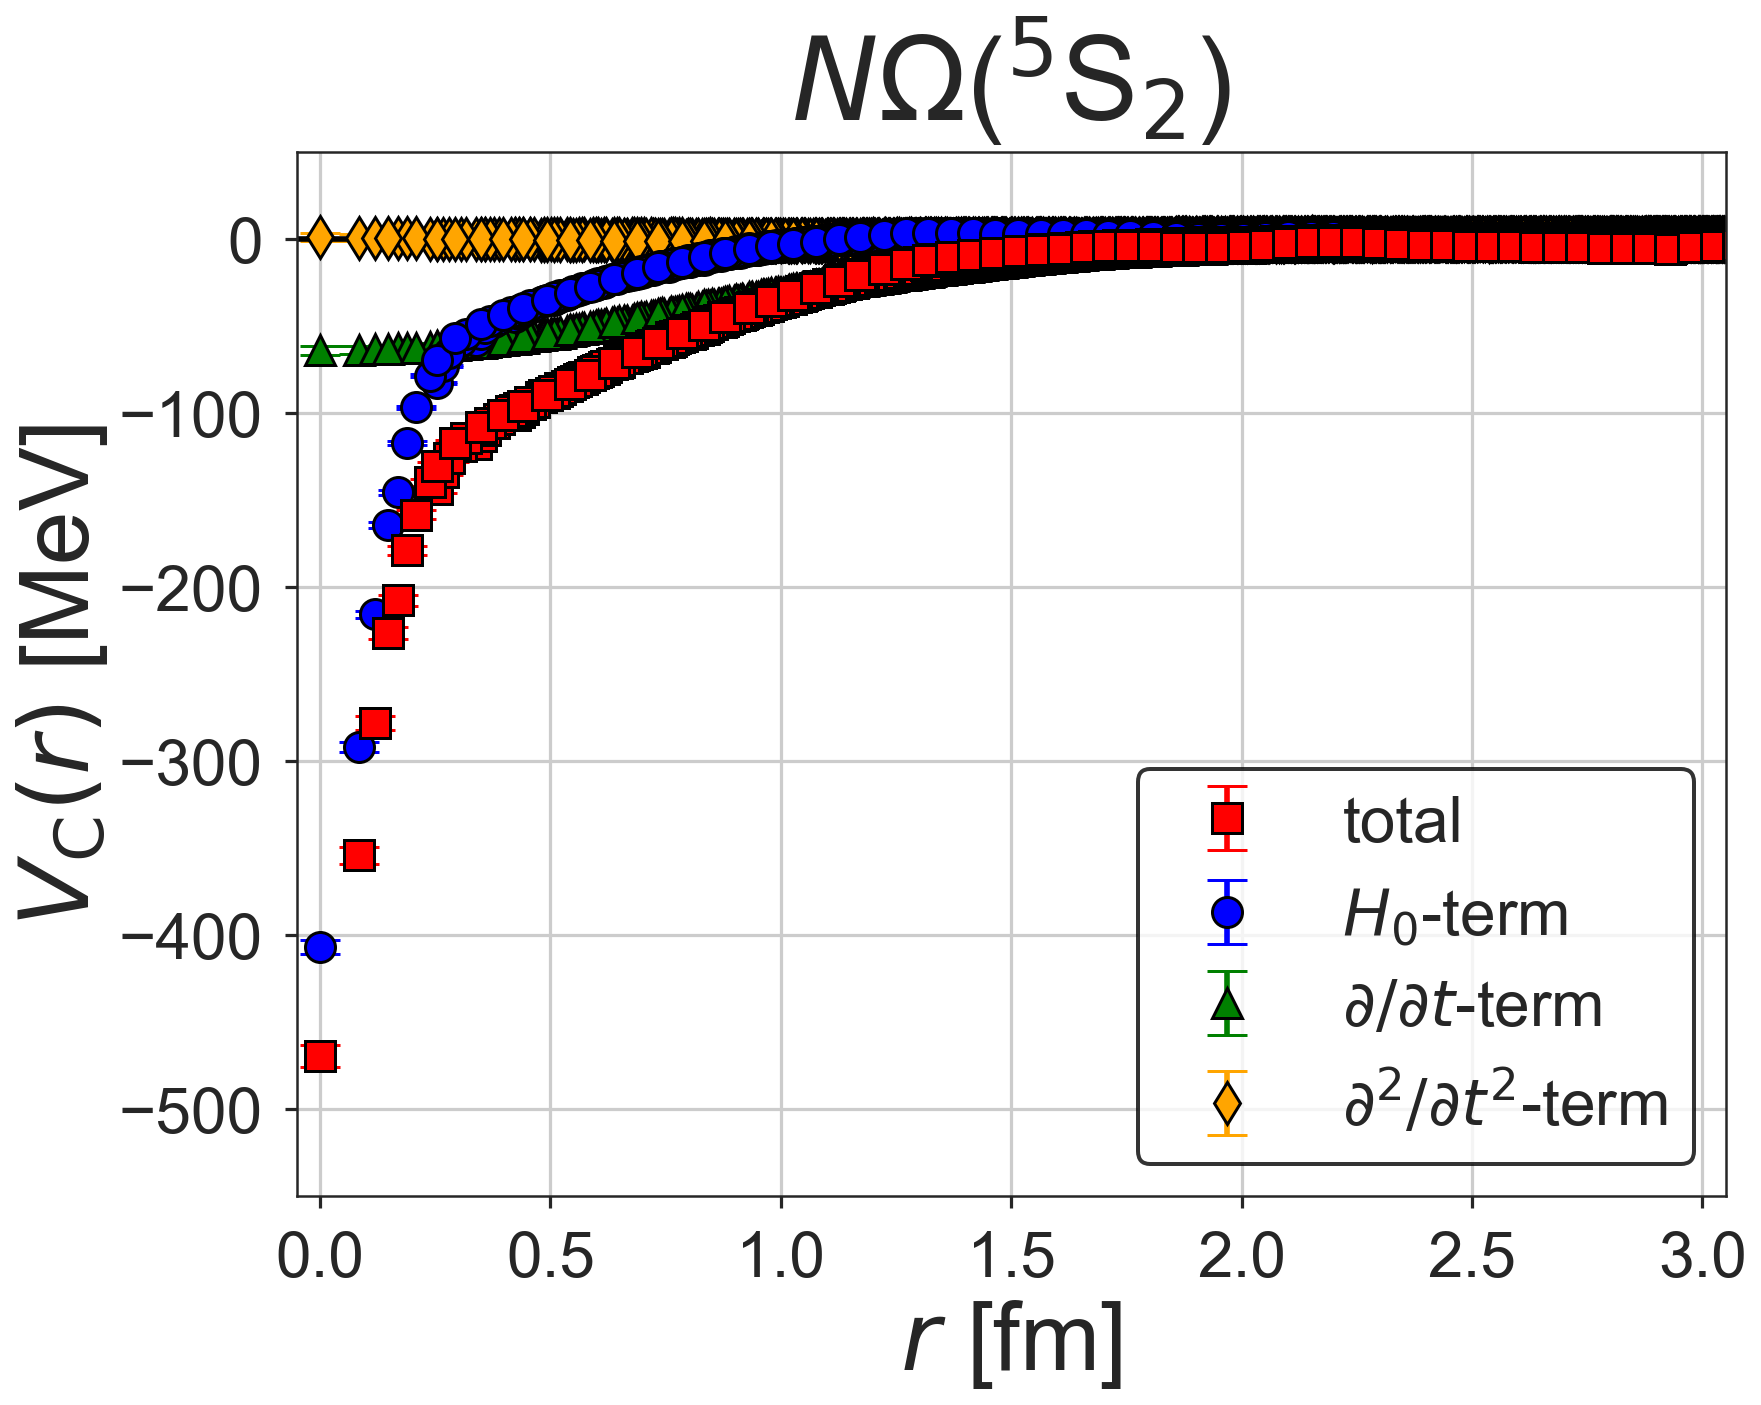

In [11]:
it = 12
spin = 2
def plot_breakup(it=12):
    fig, ax = plt.subplots()

    ax.errorbar(pot_av[it][:,0]*lat_unit, 
                pot_av[it][:,5]*ainv, 
                pot_av[it][:,6]*ainv, fmt='d', mec='black', mew=1.5,
                color='orange', ms=15, label='$\partial^2/\partial t^2$-term',
                capsize=10, capthick=10.0) #, label=rf'$t = {it}$')

    ax.errorbar(pot_av[it][:,0]*lat_unit, 
                pot_av[it][:,3]*ainv, 
                pot_av[it][:,4]*ainv, fmt='^', mec='black', mew=1.5,
                color='green', ms=15, label='$\partial/\partial t$-term',
                capsize=10, capthick=10.0) #, label=rf'$t = {it}$')

    ax.errorbar(pot_av[it][:,0]*lat_unit, 
                pot_av[it][:,1]*ainv, 
                pot_av[it][:,2]*ainv, fmt='o', mec='black', mew=1.5,
                color='blue', ms=15, label=r'$H_0$-term',
                capsize=10, capthick=10.0) #, label=rf'$t = {it}$')

    ax.errorbar(pot_av[it][:,0]*lat_unit, 
                pot_av[it][:,7]*ainv, 
                pot_av[it][:,8]*ainv, fmt='s', mec='black', mew=1.5,
                color='red', ms=15, label=r'total', 
                capsize=10, capthick=10.0) #, label=rf'$t = {it}$')

    ax.set_xlim(-0.05, 3.05)
    ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3.0])
    ax.set_ylim(-550, 50)
    ax.axhline(0, color='black')

    ax.set_ylabel(r'$V_\mathrm{C}(r)$ [MeV]', size=48)
    ax.set_xlabel(r'$r$ [fm]', size=48)
    ax.set_title(r'$N\Omega$($^5$S$_2$)', size=58, y=1.02)

    hh, ll = ax.get_legend_handles_labels()
    hh = hh[::-1]
    ll = ll[::-1]

    leg = ax.legend(hh, ll, frameon=True)
    leg.get_frame().set_edgecolor('black')
    leg.get_frame().set_linewidth(2.0)

    fig.savefig(f'../figs/potential/pot_nomega_t{it:03d}_breakup.png', bbox_inches='tight')

plot_breakup()

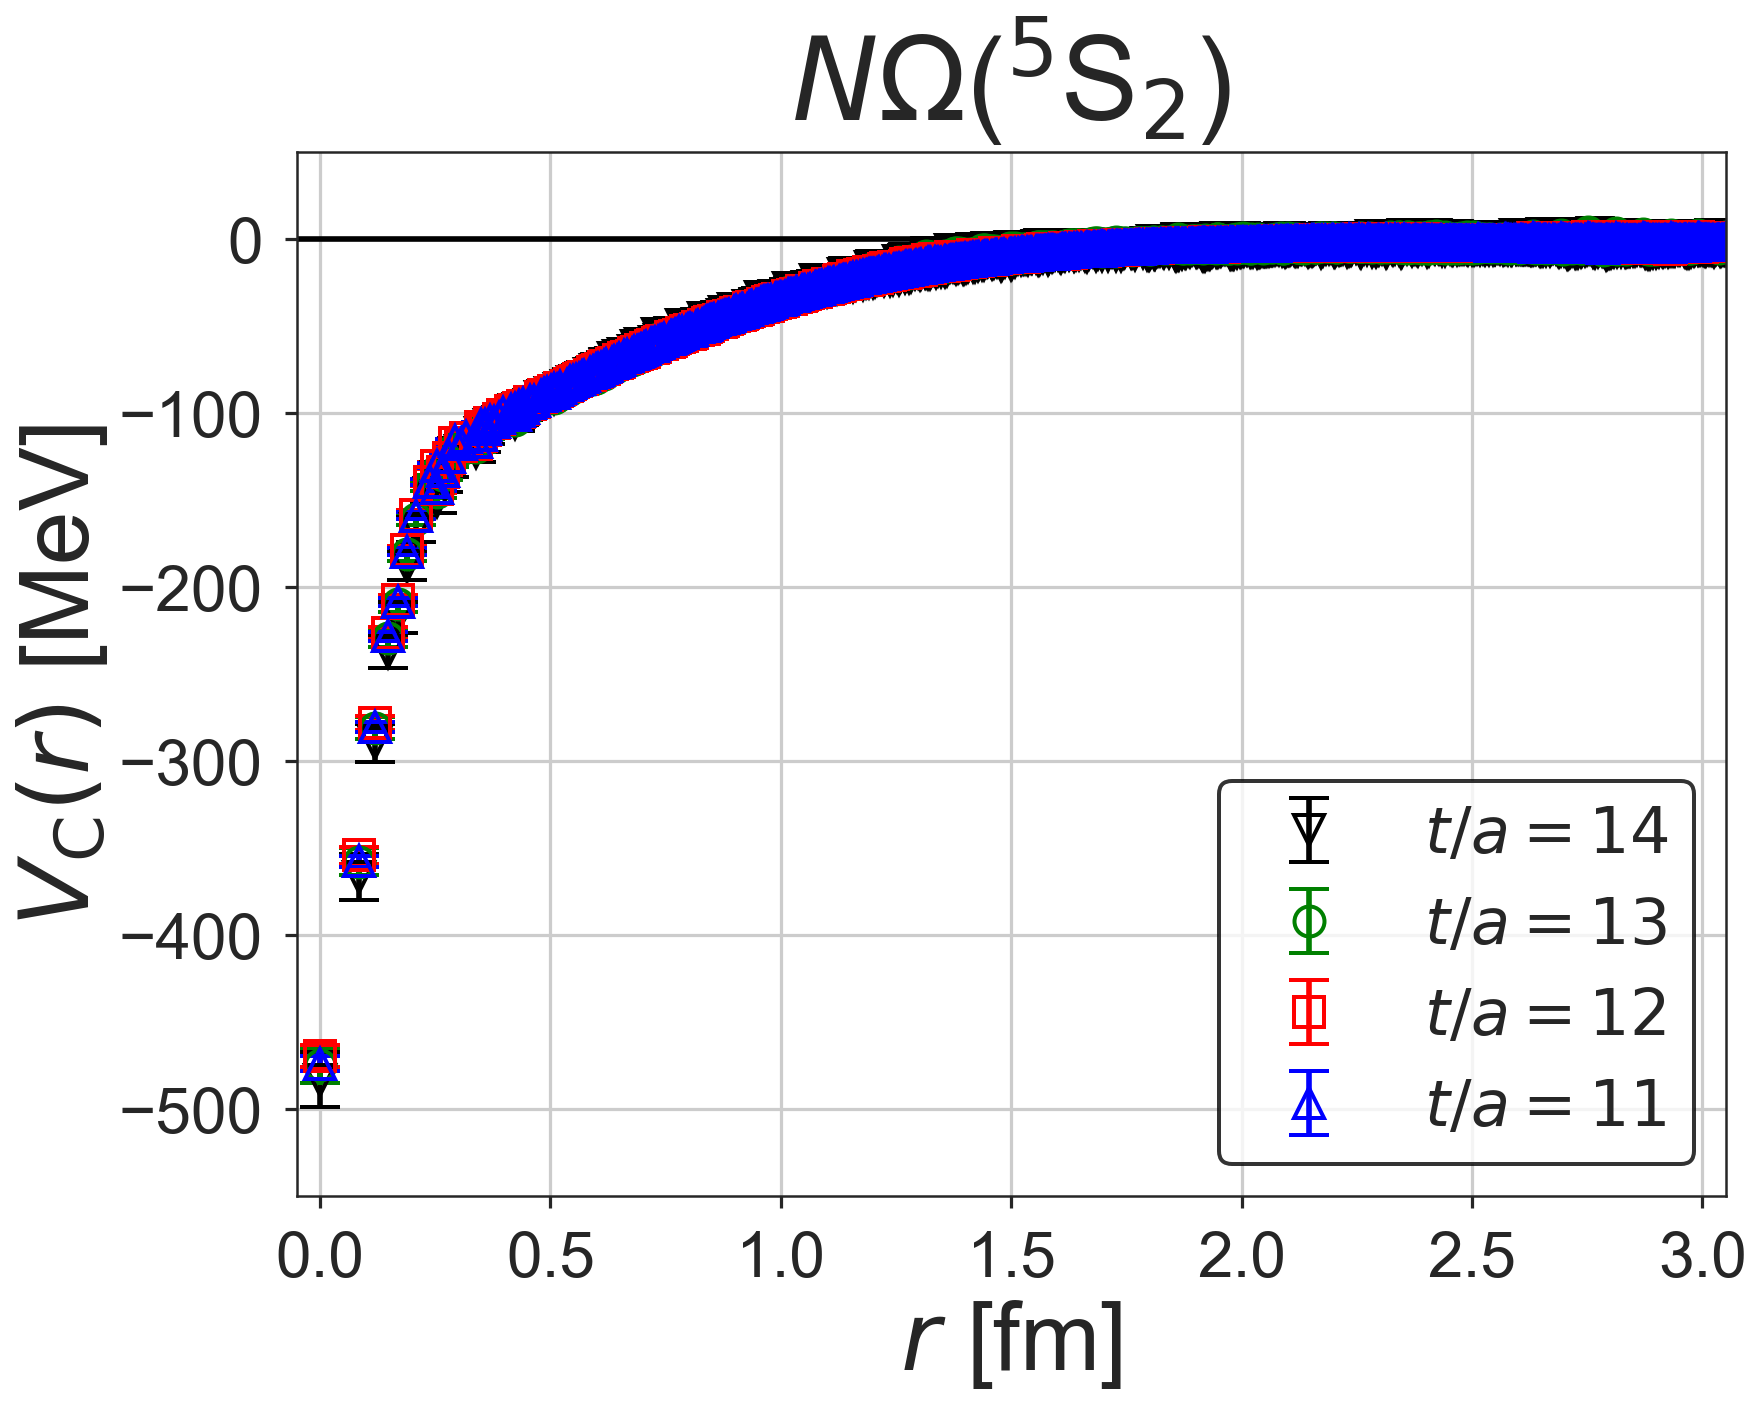

In [12]:
def plot_t_dep_of_potentials():
    fig, ax = plt.subplots()
    for it, col, sym in zip([14, 13, 12, 11], ['black', 'green', 'red', 'blue'],
                           ['v', 'o', 's', '^']):
        ax.errorbar(pot_av[it][:,0]*lat_unit, 
                    pot_av[it][:,7]*ainv, 
                    pot_av[it][:,8]*ainv, fmt=sym, mec=col, mew=2.0,
                    color=col, ms=15, mfc='none', 
                    capsize=10, capthick=2.0, label=rf'$t/a = {it}$')

    ax.set_xlim(-0.05, 3.05)
    ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3.0])
    ax.set_ylim(-550, 50)
    ax.axhline(0, color='black')
    #leg = ax.legend(loc='lower right', ncol=2, frameon=True)
    #leg.get_frame().set_edgecolor('black')
    #leg.get_frame().set_linewidth(2.0)
    ax.set_ylabel(r'$V_\mathrm{C}(r)$ [MeV]', size=48)
    ax.set_xlabel(r'$r$ [fm]', size=48)
    ax.set_title(r'$N\Omega$($^5$S$_2$)', size=58, y=1.02)

    leg = ax.legend(frameon=True)
    leg.get_frame().set_edgecolor('black')
    leg.get_frame().set_linewidth(2.0)

    fig.savefig('../figs/potential/pot_nomega_t11_14.png', bbox_inches='tight')
    
plot_t_dep_of_potentials()

magnify tail part of the potential

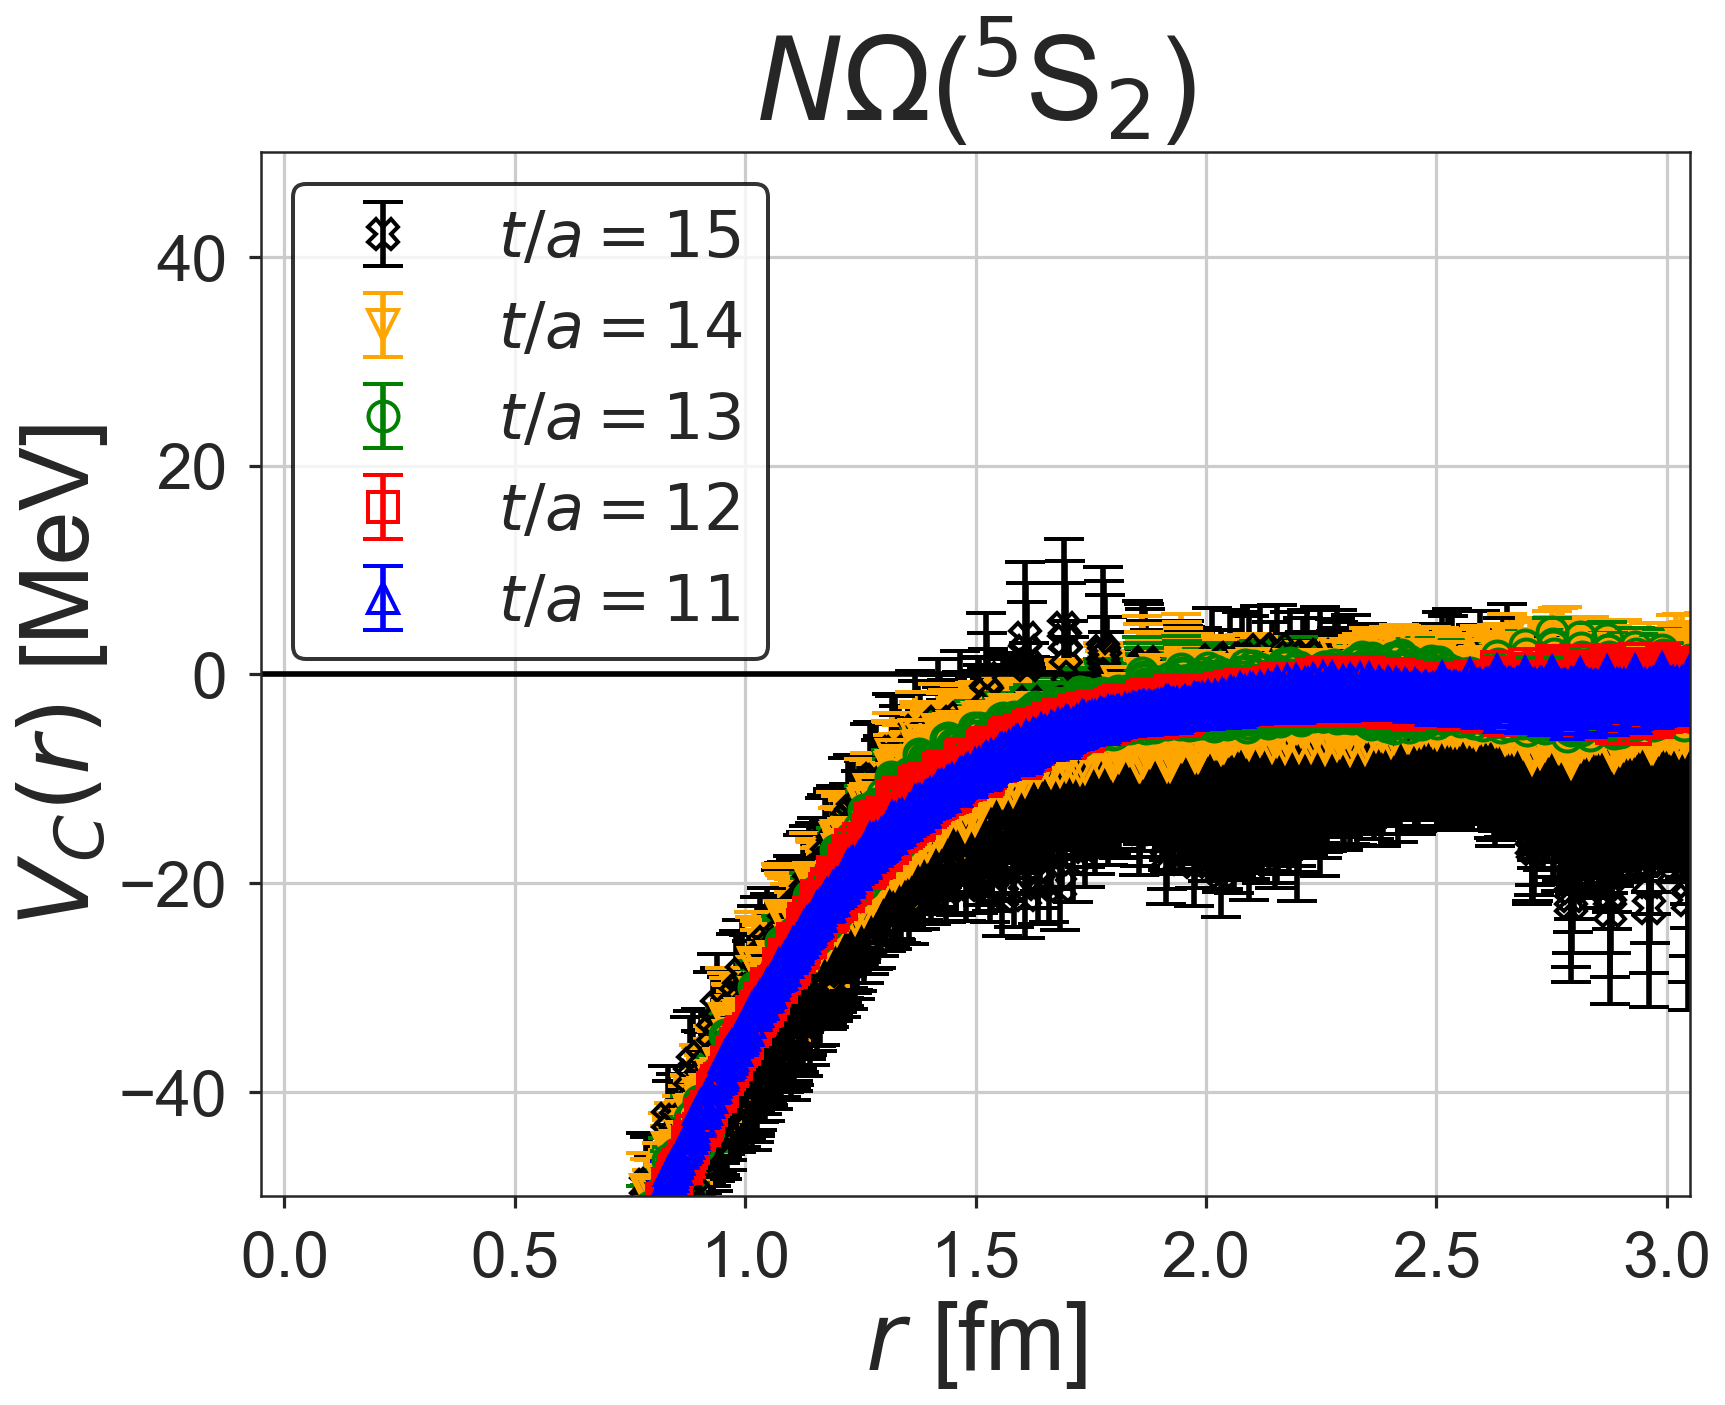

In [13]:
fig, ax = plt.subplots()
for it, col, sym in zip([15, 14, 13, 12, 11], ['black', 'orange', 'green', 'red', 'blue'],
                       ['X', 'v', 'o', 's', '^']):
    ax.errorbar(pot_av[it][:,0]*lat_unit, 
                pot_av[it][:,7]*ainv, 
                pot_av[it][:,8]*ainv, fmt=sym, mec=col, mew=2.0,
                color=col, ms=15, mfc='none', 
                capsize=10, capthick=2.0, label=rf'$t/a = {it}$')

ax.set_xlim(-0.05, 3.05)
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3.0])
ax.set_ylim(-50, 50)
ax.axhline(0, color='black')

ax.set_ylabel(r'$V_C(r)$ [MeV]', size=48)
ax.set_xlabel(r'$r$ [fm]', size=48)
ax.set_title(r'$N\Omega$($^5$S$_2$)', size=58, y=1.02)

leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)

# fitting potential

using gauss + yukawa-square with form factor

\begin{equation}
V(r)  = b_1 e^{-b_2 r^2} + b_3 (1 - e^{-b_4 r^2})^n \left( \frac{e^{-m_\pi r}}{r} \right)^2
\end{equation}

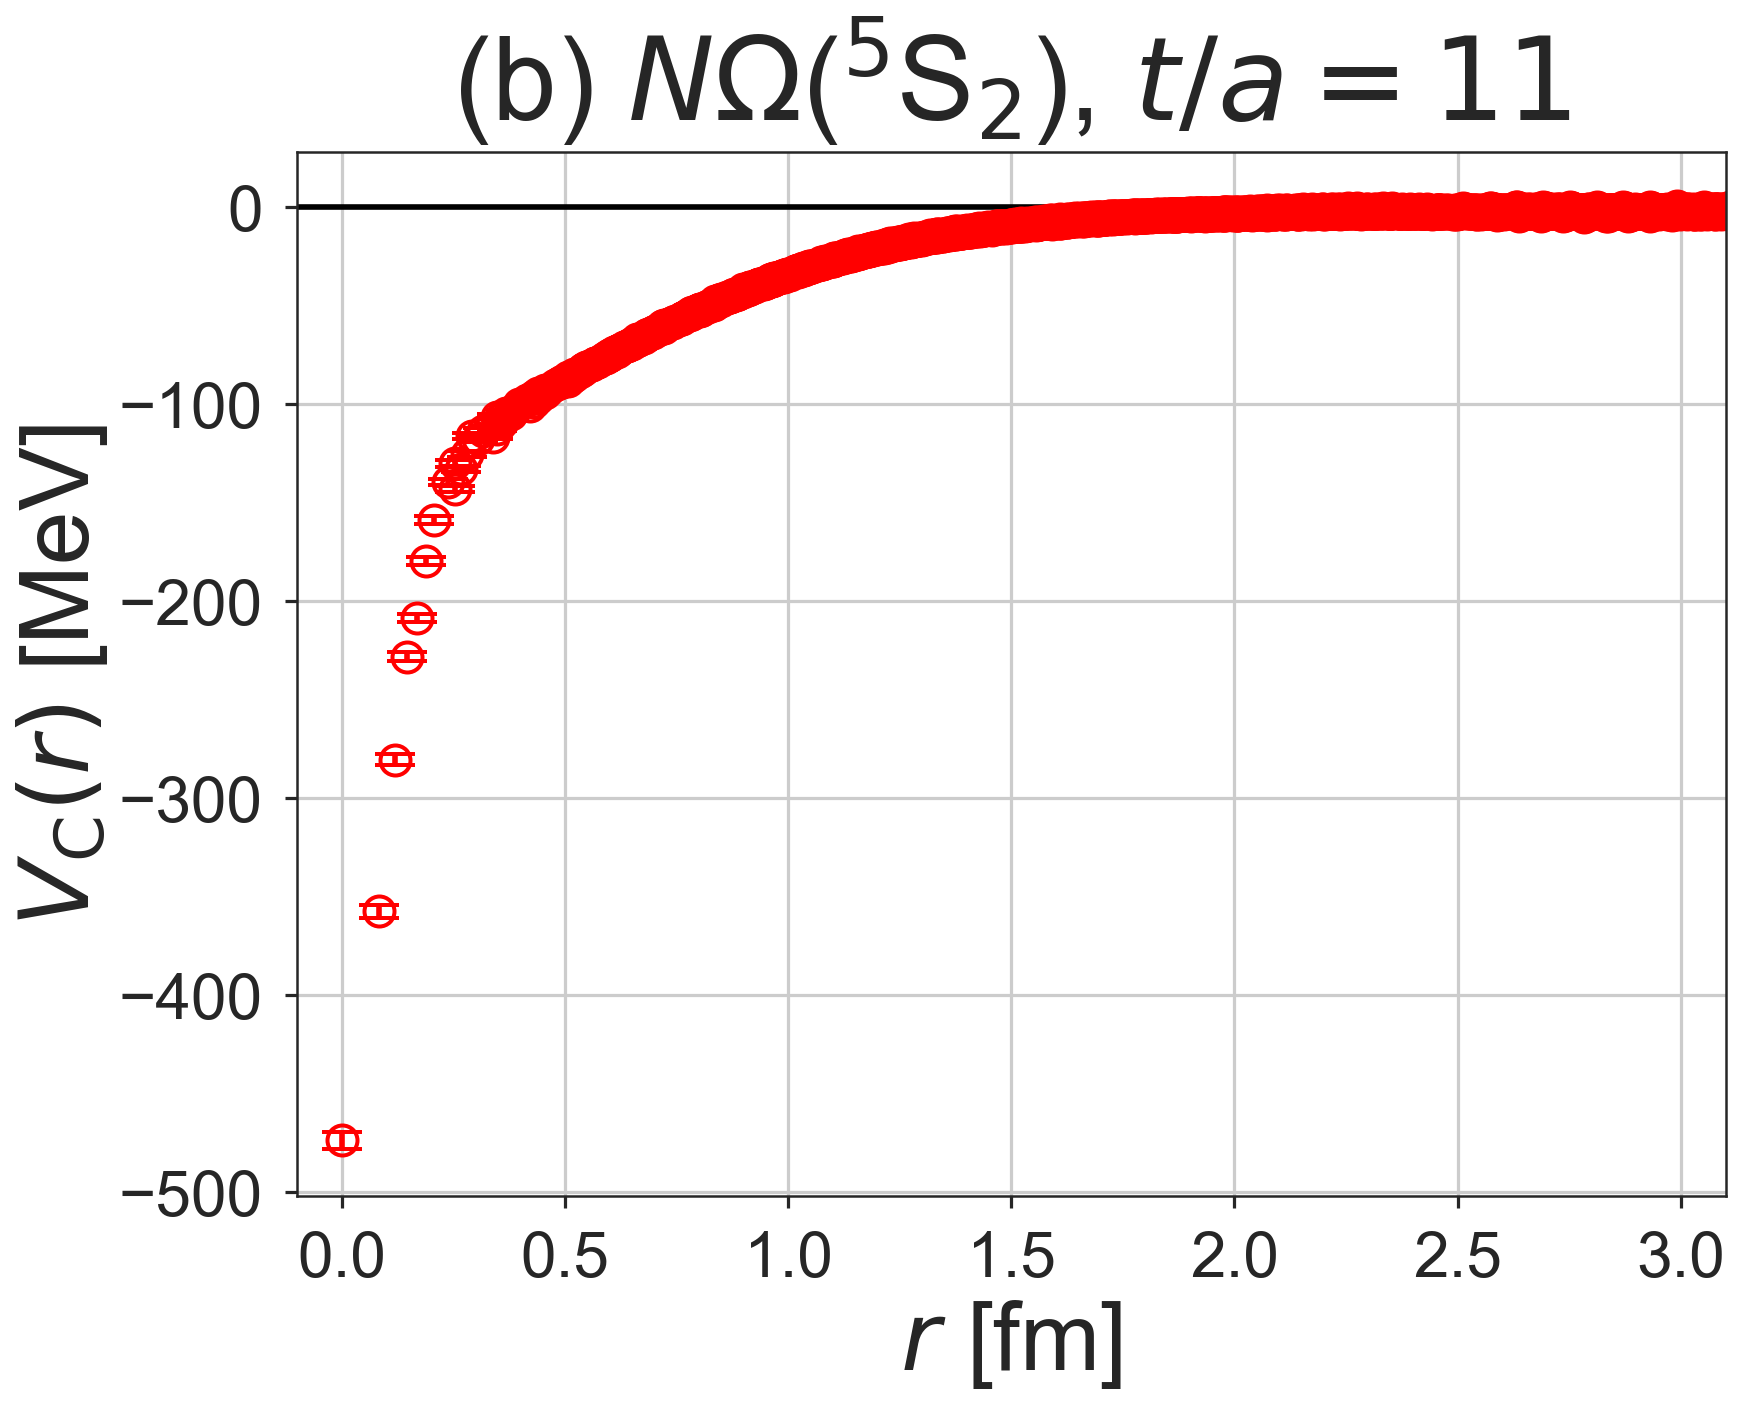

In [14]:
def plot_pot(it, ax, label=None, vfit = None):
    spin = 2
    sym = {11: '^', 12:'s', 13:'o'}[13]
    col = {11: 'green', 12:'blue', 13:'red'}[13]
    ax.errorbar(pot_av[it][:,0]*lat_unit,
           pot_av[it][:,7]*ainv, pot_av[it][:,8]*ainv, fmt=sym, ms=15,
                capsize=10, capthick=2.0, mfc='none', mew=2.0,
           color=col, label=r'$V_\mathrm{C}(r)$')

    ax.axhline(0, color='black')

    ax.set_xlabel(r'$r$ [fm]', size=48)
    ax.set_ylabel(r'$V_\mathrm{C}(r)$ [MeV]', size=48)
    ax.set_xlim(-0.10, 3.10)
    ax.set_title(rf'{label} $N\Omega$($^{{{spin*2+1:d}}}$S$_{{{spin:d}}}$), $t/a = {it:d}$', size=58, y=1.02)
    
    if vfit:
        xls = np.linspace(1.0e-3, 3.10/lat_unit, 200)
        ax.plot(xls*lat_unit, vfit(xls)*ainv, lw=5.0, color='blue', linestyle='--', zorder=8)
        
fig, ax = plt.subplots()
plot_pot(11, ax, label='(b)')

In [15]:
def pot_fit(xs, ys, yerrs, vfit, p0, rmax=3.0/lat_unit, rmin=0.01/lat_unit):
    """
    xs : r
    ys : potential 
    yerrs : error of potential
    vfit : fit function
    p0 : initial parameter
    """
    mask = (xs >= rmin) & (xs <= rmax)
    errf = lambda p, y, x, err : (vfit(p,x) - y)/err
    
    pfit = scipy.optimize.leastsq(errf, p0, args=(ys[mask], xs[mask], yerrs[mask]),
                                 full_output=True)
    dof = len(xs[mask]) - len(p0)
    chisq = sum(pfit[2]['fvec']**2)
    
    return pfit[0], dof, chisq

In [16]:
V_fit = lambda p, x: p[0] * np.exp(-p[1]*x**2) + p[2] *  (
                1 - np.exp(-p[3]*x**2)) * (np.exp(-mpi*x)/(x+1.0e-5))**2

[-1.31360850e-01  5.28340557e-01 -1.59522978e+01  5.56207326e-03]
[-1.34154329e-01  5.84544083e-01 -1.50776079e+01  6.05098462e-03]
[-1.35748706e-01  5.85621042e-01 -1.41899277e+01  6.51512991e-03]
[-1.26791362e-01  4.57681154e-01 -1.62982705e+01  5.42508538e-03]


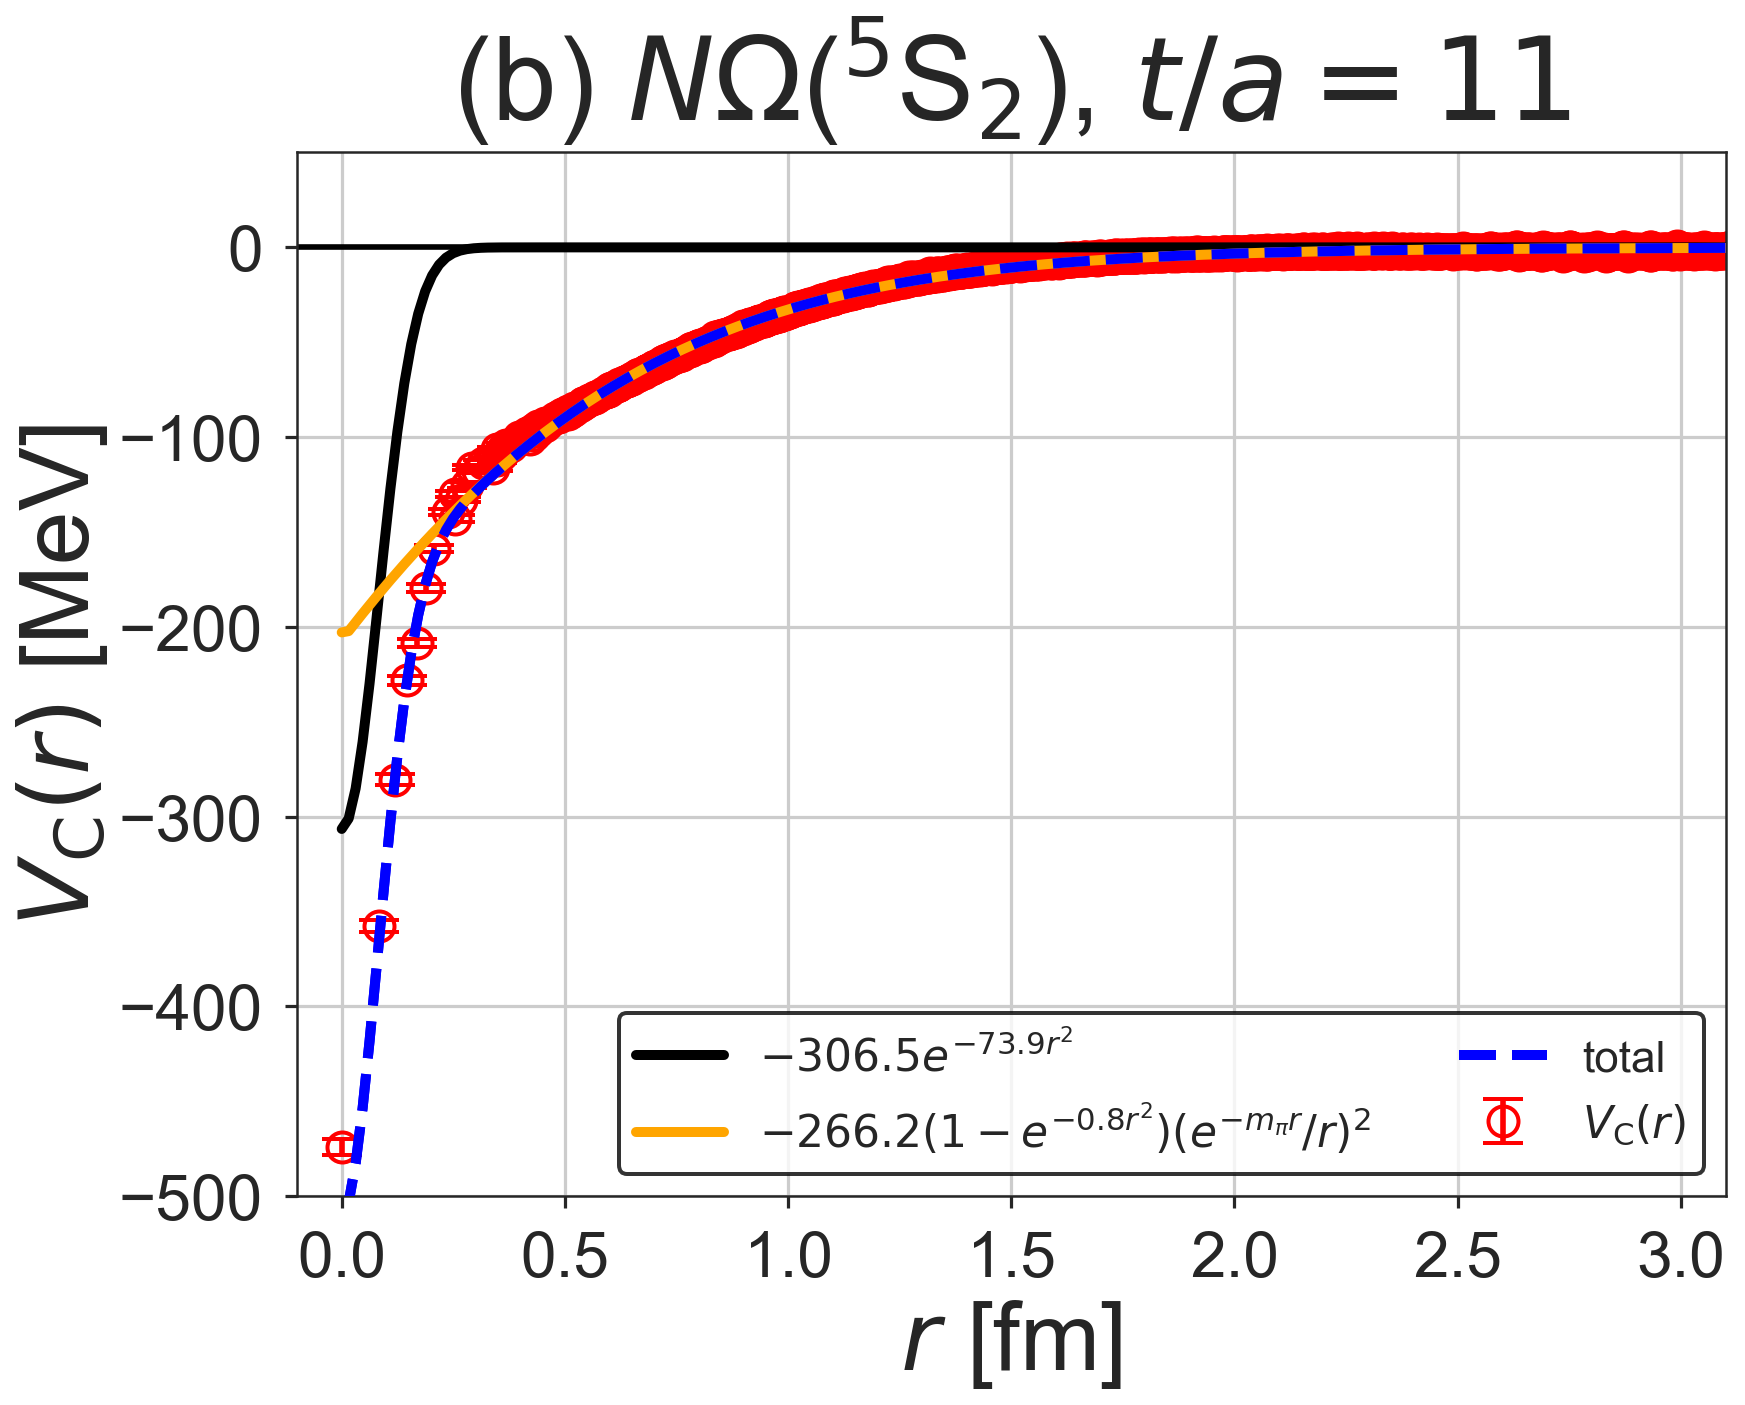

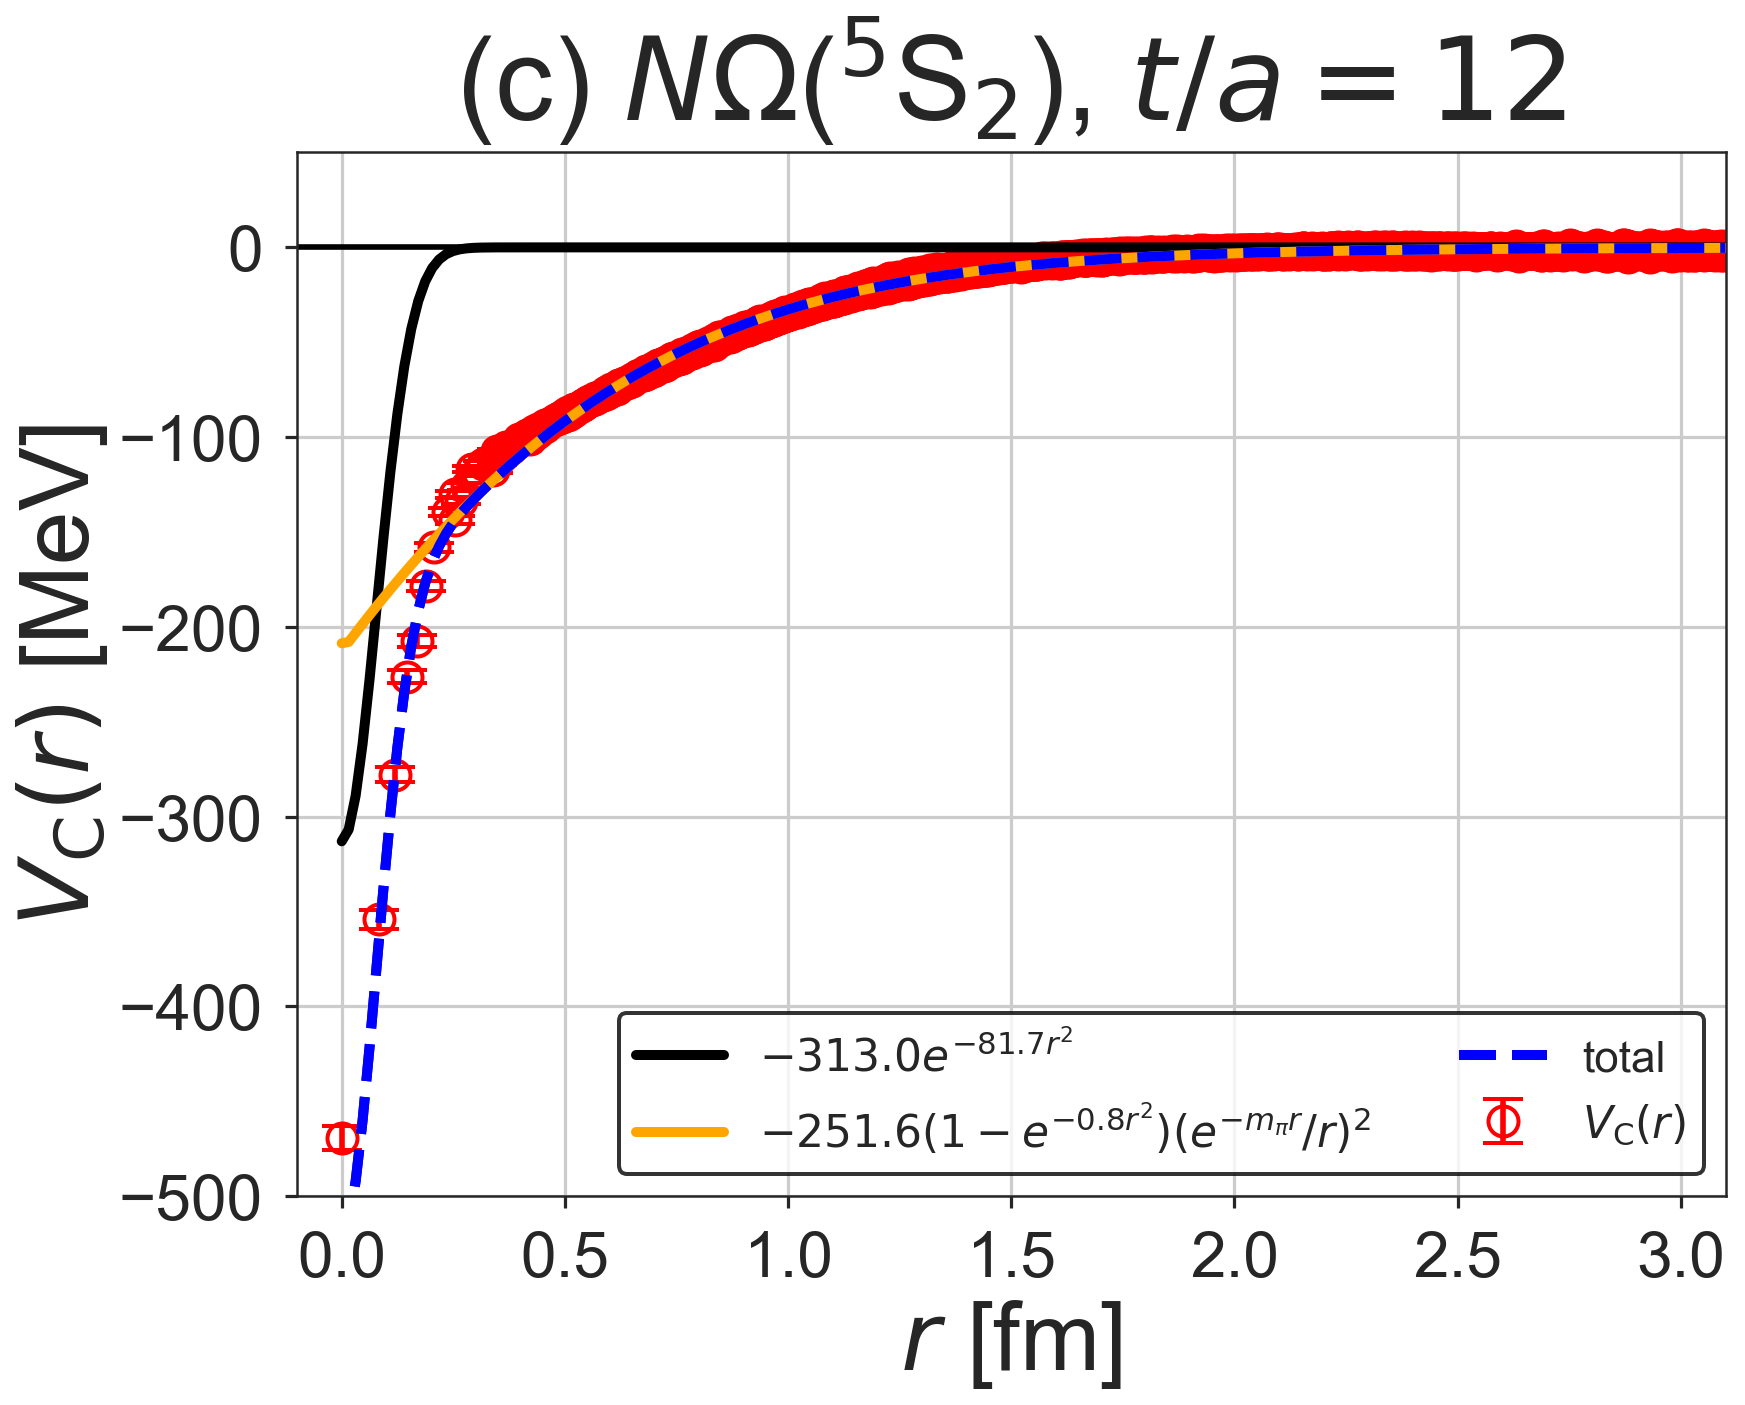

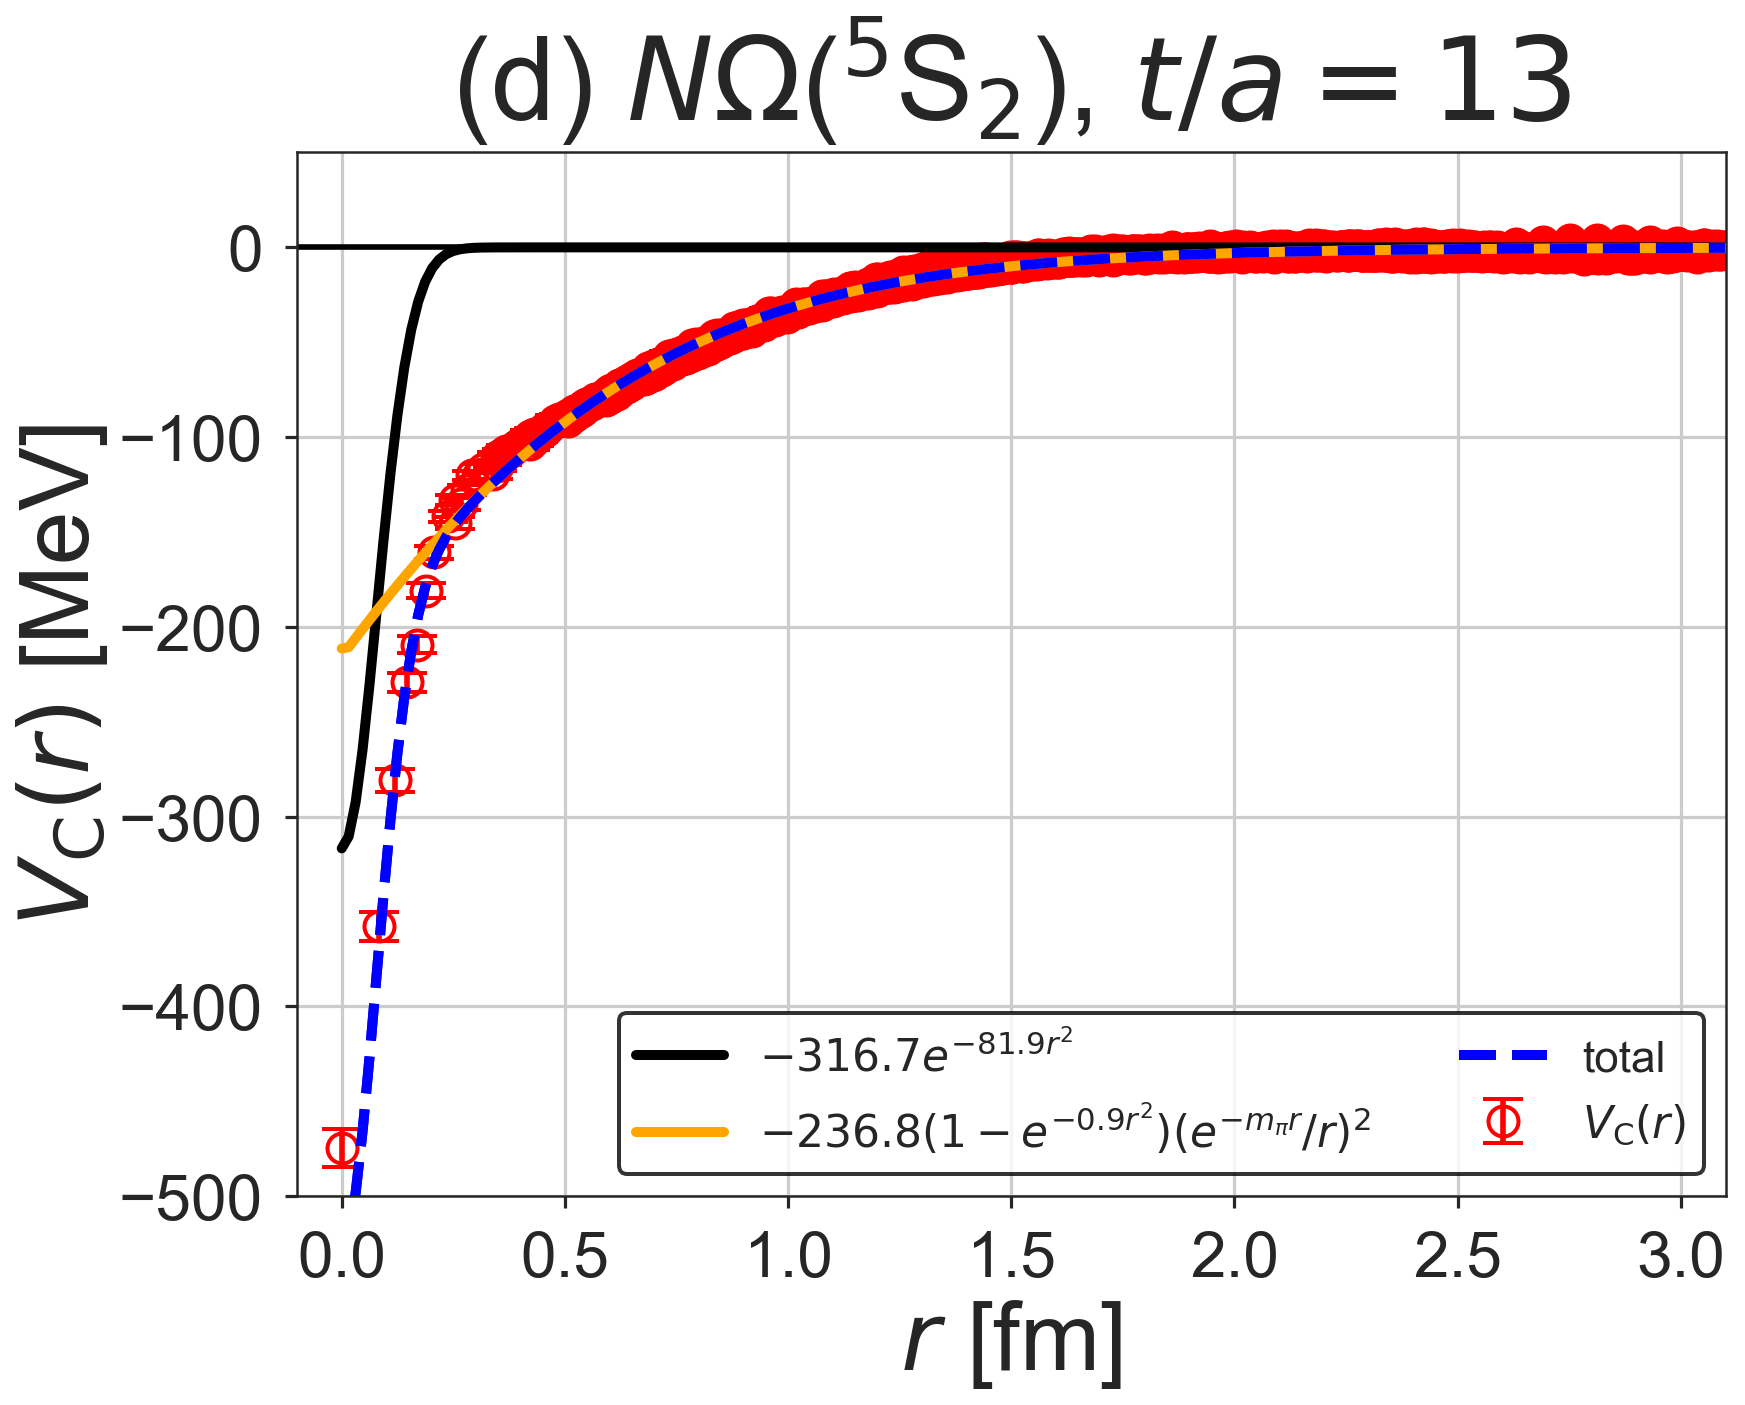

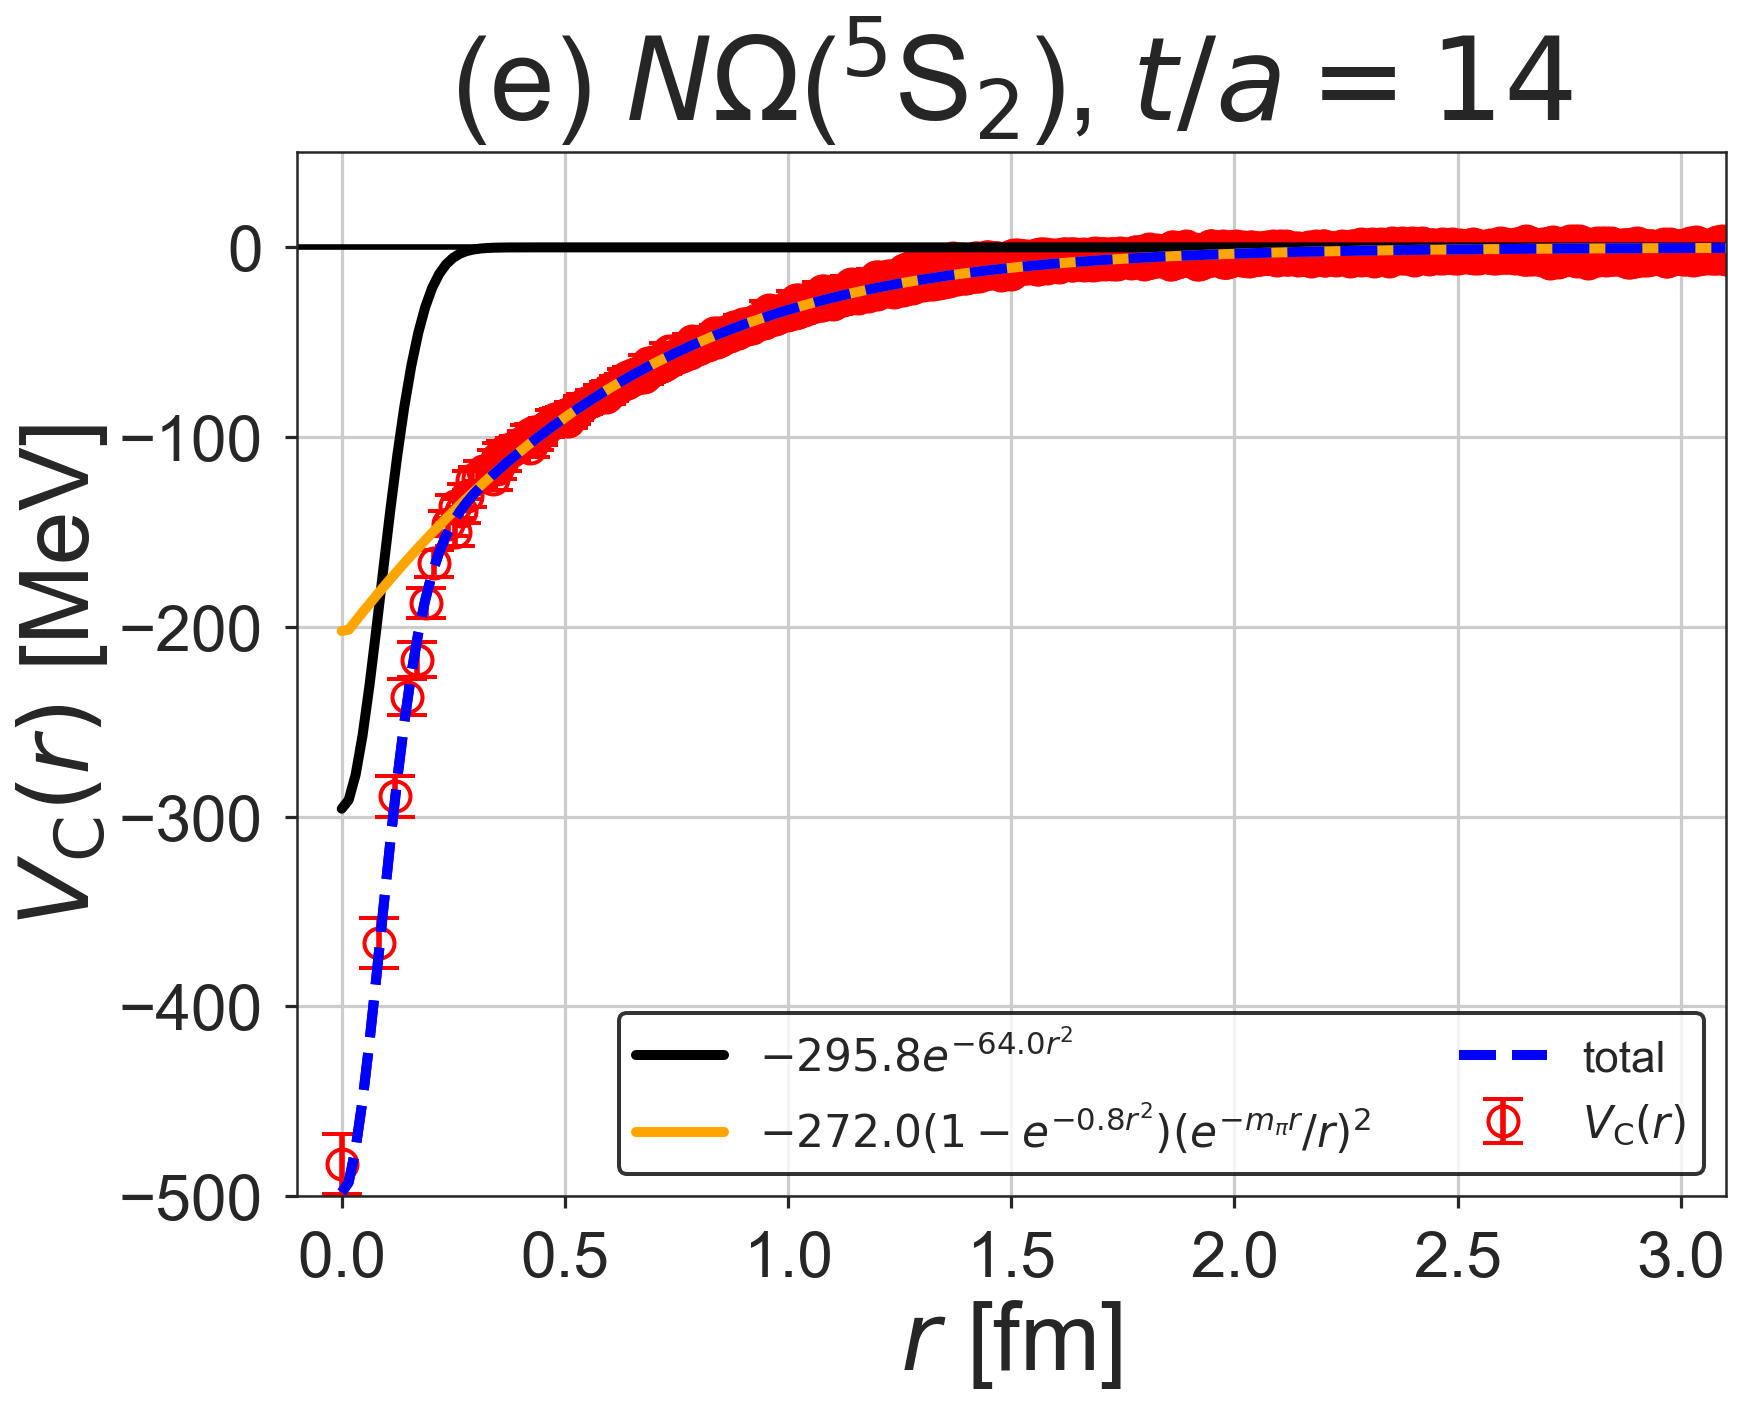

In [17]:
def fit_pot_averaged(it, label):
    xs, ys, yerrs = pot_av[it][:,0], pot_av[it][:,7], pot_av[it][:,8]
    p0 = [-0.1, 0.5, -15, 5.0e-3]

    _prm, _, _ = pot_fit(xs, ys, yerrs, V_fit, p0)

    fig, ax = plt.subplots()
    vfit = lambda x: V_fit(_prm, x)
    plot_pot(it, ax, label, vfit)
    xls = np.linspace(1.0e-3, 3.10/lat_unit, 200)
    print(_prm)
    ax.plot(xls*lat_unit, V_fit([_prm[0], _prm[1], 0, 0], xls)*ainv, color='black', label=r'${:2.1f}e^{{-{:2.1f}r^2}}$'.format(
                        _prm[0]*ainv, _prm[1]/lat_unit**2),
           zorder=3, lw=5)
    ax.plot(xls*lat_unit, V_fit([0, 0, _prm[2], _prm[3]], xls)*ainv, color='orange', 
            label=r'${:2.1f}(1-e^{{-{:2.1f}r^2}})(e^{{-m_\pi r}}/r)^2$'.format(_prm[2]/ainv*hbarc**2,
                                                                              _prm[3]/lat_unit**2),
           zorder=8, lw=5)
    ax.plot(xls*lat_unit, V_fit(_prm, xls)*ainv, color='blue', linestyle='--', label=r'total',
           zorder=8, lw=5)

    leg = ax.legend(ncol=2, frameon=True, fontsize=22)
    leg.get_frame().set_edgecolor('black')
    leg.get_frame().set_linewidth(2.0)
    ax.set_ylim(-500, 50)
    
# check quality of fitting using averaged potential
for it, ll in zip([11, 12, 13, 14], ['(b)', '(c)', '(d)', '(e)']):
    fit_pot_averaged(it, ll)

[-1.31360850e-01  5.28340557e-01 -1.59522978e+01  5.56207326e-03]


HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

0 [-1.30960220e-01  5.18545708e-01 -1.65709125e+01  5.33330679e-03]
1 [-1.31178688e-01  5.20986824e-01 -1.61865294e+01  5.46483577e-03]
2 [-1.31021501e-01  5.23718873e-01 -1.61332965e+01  5.48218214e-03]
3 [-1.32183248e-01  5.28751939e-01 -1.58226736e+01  5.61745776e-03]
4 [-1.31905498e-01  5.39752345e-01 -1.53194832e+01  5.83085691e-03]
5 [-1.30519421e-01  5.26935793e-01 -1.62576345e+01  5.45997683e-03]
6 [-1.31783823e-01  5.37417788e-01 -1.51837157e+01  5.87180124e-03]
7 [-1.31832509e-01  5.25326006e-01 -1.61711523e+01  5.46619775e-03]
8 [-1.30575608e-01  5.18473957e-01 -1.63740727e+01  5.36437688e-03]
9 [-1.31668478e-01  5.29032386e-01 -1.57200627e+01  5.67062978e-03]
10 [-1.30674790e-01  5.18831232e-01 -1.67148620e+01  5.26649373e-03]
11 [-1.31224680e-01  5.31086026e-01 -1.54506107e+01  5.77010244e-03]
12 [-1.31913035e-01  5.39479477e-01 -1.54354461e+01  5.77125943e-03]
13 [-1.32040310e-01  5.33081345e-01 -1.54548694e+01  5.77456977e-03]
14 [-1.31863063e-01  5.37924144e-01 -1.58150

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

0 [-1.34358050e-01  5.71496883e-01 -1.57082100e+01  5.79765825e-03]
1 [-1.34314431e-01  5.77958614e-01 -1.52058635e+01  5.98394264e-03]
2 [-1.33414262e-01  5.84476437e-01 -1.55131637e+01  5.88172094e-03]
3 [-1.35145391e-01  5.89336068e-01 -1.50030314e+01  6.11376158e-03]
4 [-1.34189687e-01  6.01447382e-01 -1.43913225e+01  6.37392967e-03]
5 [-1.34361692e-01  5.88443355e-01 -1.49636770e+01  6.10576724e-03]
6 [-1.35179685e-01  5.96066555e-01 -1.46302894e+01  6.25038638e-03]
7 [-1.33578681e-01  5.84134955e-01 -1.52601855e+01  5.98167019e-03]
8 [-1.33459652e-01  5.73765664e-01 -1.56488118e+01  5.77873932e-03]
9 [-1.33870259e-01  5.84069261e-01 -1.48964146e+01  6.16139118e-03]
10 [-1.33323404e-01  5.67741142e-01 -1.55154194e+01  5.83345769e-03]
11 [-1.34335181e-01  5.90085879e-01 -1.52059197e+01  6.01199355e-03]
12 [-1.33912193e-01  5.82443847e-01 -1.51065663e+01  6.01898253e-03]
13 [-1.34583949e-01  5.87748987e-01 -1.44517722e+01  6.35566697e-03]
14 [-1.34652930e-01  5.89415449e-01 -1.51811

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

0 [-1.36221690e-01  5.78724127e-01 -1.44972219e+01  6.37206948e-03]
1 [-1.34730730e-01  5.71023796e-01 -1.46434653e+01  6.25847201e-03]
2 [-1.35993058e-01  5.95426279e-01 -1.50688141e+01  6.14407265e-03]
3 [-1.36169205e-01  5.99582862e-01 -1.36431577e+01  6.84292364e-03]
4 [-1.35205704e-01  6.03226402e-01 -1.36632379e+01  6.78834985e-03]
5 [-1.34936764e-01  5.57550287e-01 -1.51002708e+01  6.06088469e-03]
6 [-1.36052696e-01  5.94191989e-01 -1.44711500e+01  6.39745563e-03]
7 [-1.33467194e-01  5.93723466e-01 -1.37443136e+01  6.77985485e-03]
8 [-1.34778239e-01  5.77405288e-01 -1.45305958e+01  6.33577565e-03]
9 [-1.36666109e-01  5.89092219e-01 -1.40344275e+01  6.61704819e-03]
10 [-1.34768238e-01  5.90029751e-01 -1.36994196e+01  6.74130589e-03]
11 [-1.35881236e-01  5.80116463e-01 -1.54868441e+01  5.96838398e-03]
12 [-1.35293326e-01  5.72056029e-01 -1.43658276e+01  6.34908547e-03]
13 [-1.36124612e-01  5.83280116e-01 -1.38608095e+01  6.69729910e-03]
14 [-1.35834020e-01  5.75222848e-01 -1.43214

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

0 [-1.27298300e-01  4.44371005e-01 -1.75770937e+01  4.95612230e-03]
1 [-1.26106839e-01  4.56112141e-01 -1.57542758e+01  5.62121182e-03]
2 [-1.27167207e-01  4.76556905e-01 -1.72275189e+01  5.17172140e-03]
3 [-1.29680913e-01  4.91730189e-01 -1.45085241e+01  6.22490718e-03]
4 [-1.26890533e-01  4.61160972e-01 -1.57760503e+01  5.66374273e-03]
5 [-1.25107119e-01  3.97055990e-01 -1.95313803e+01  4.34960142e-03]
6 [-1.28141322e-01  4.68547451e-01 -1.69178115e+01  5.24292454e-03]
7 [-1.27705020e-01  4.56968937e-01 -1.45207602e+01  6.19320492e-03]
8 [-1.22638439e-01  4.25835660e-01 -1.76566201e+01  4.89905448e-03]
9 [-1.28263676e-01  4.70449867e-01 -1.58701952e+01  5.64660959e-03]
10 [-1.26247350e-01  4.97302012e-01 -1.38358233e+01  6.53791598e-03]
11 [-1.24884918e-01  4.33378562e-01 -1.89587322e+01  4.70267572e-03]
12 [-1.25600842e-01  4.37258773e-01 -1.76572822e+01  4.89398519e-03]
13 [-1.27056962e-01  4.65138893e-01 -1.59804478e+01  5.50673321e-03]
14 [-1.23308794e-01  4.16801552e-01 -1.78419

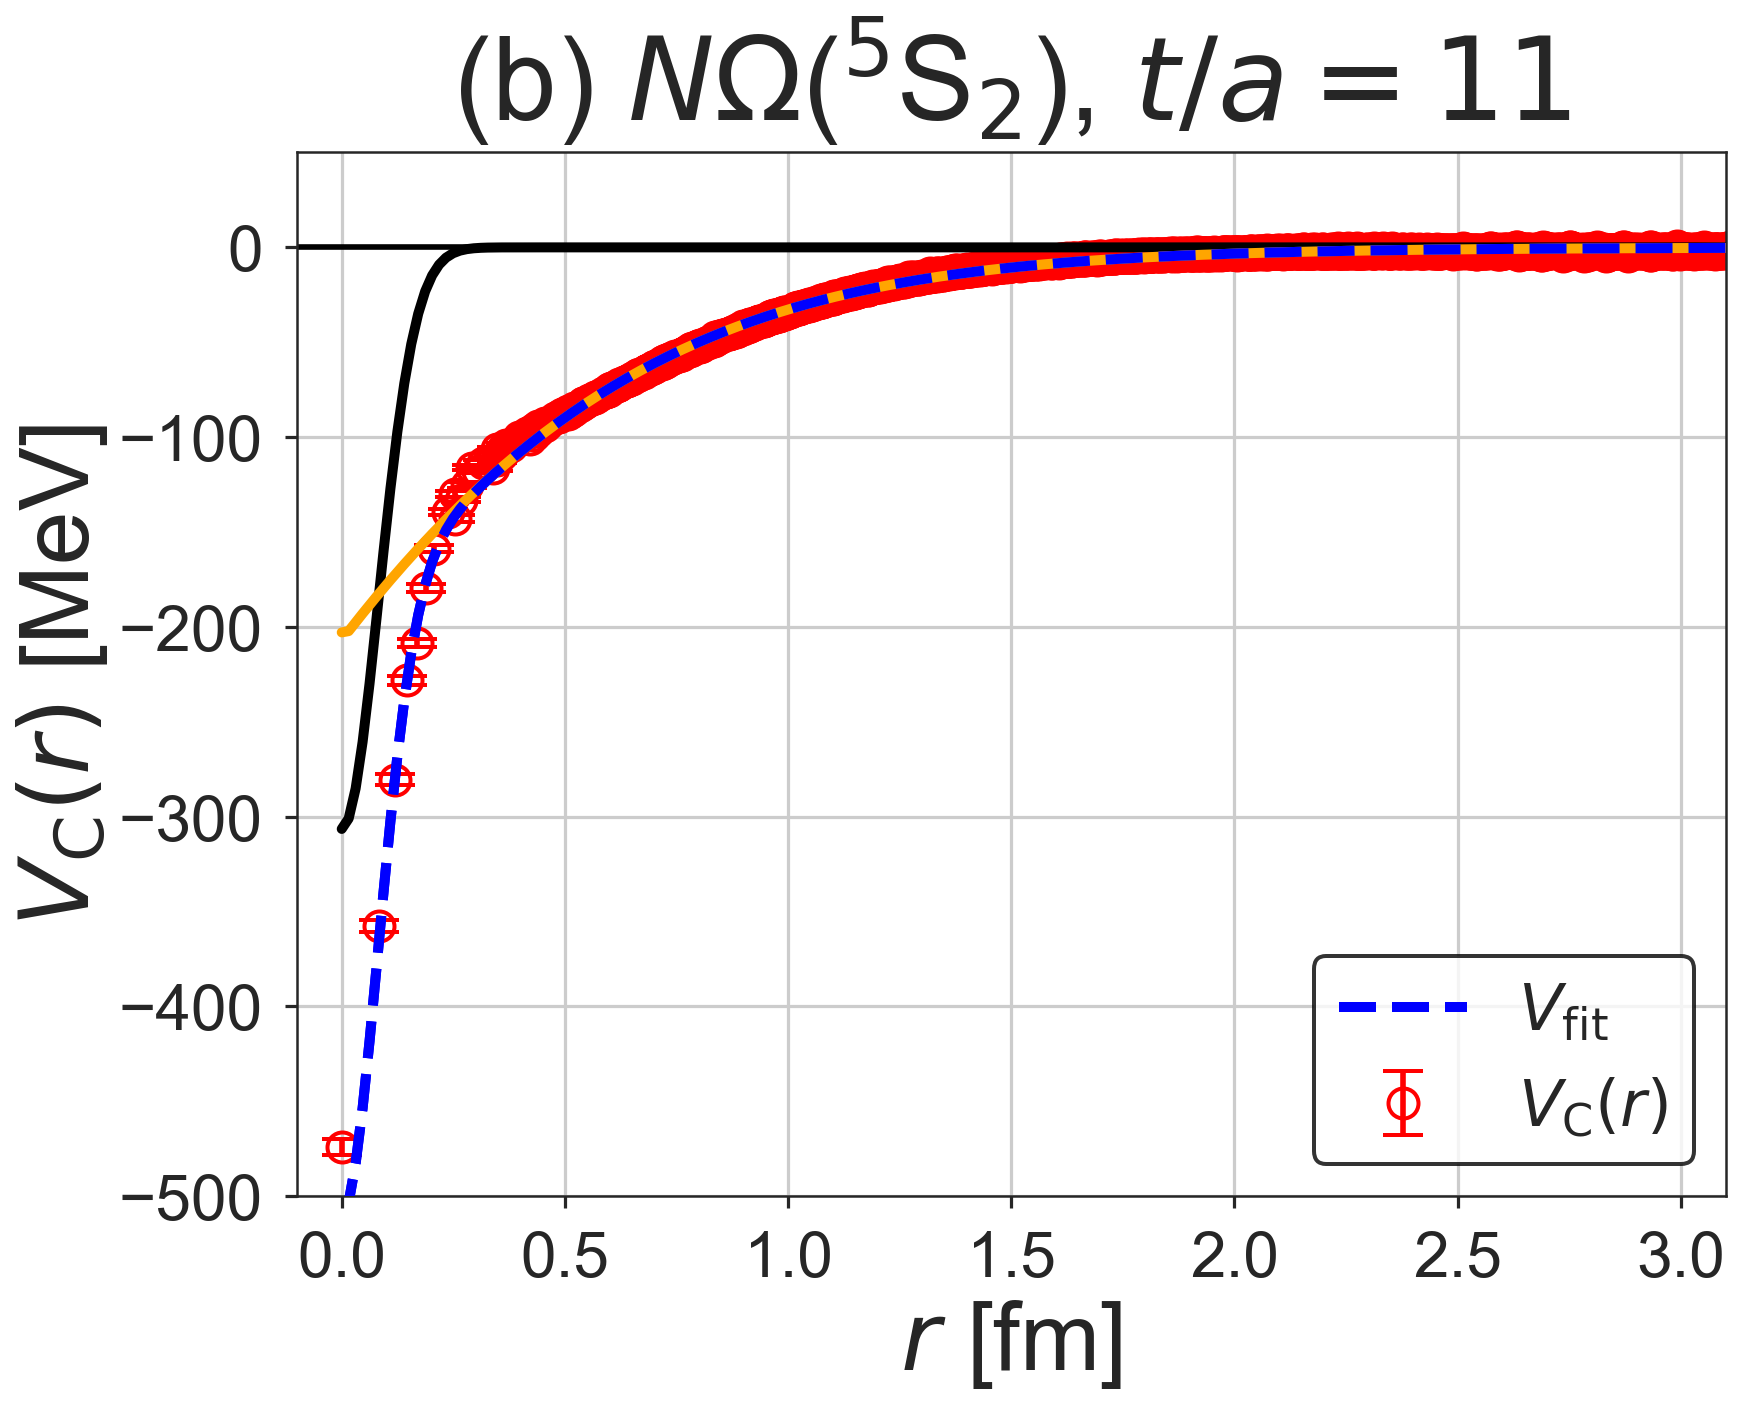

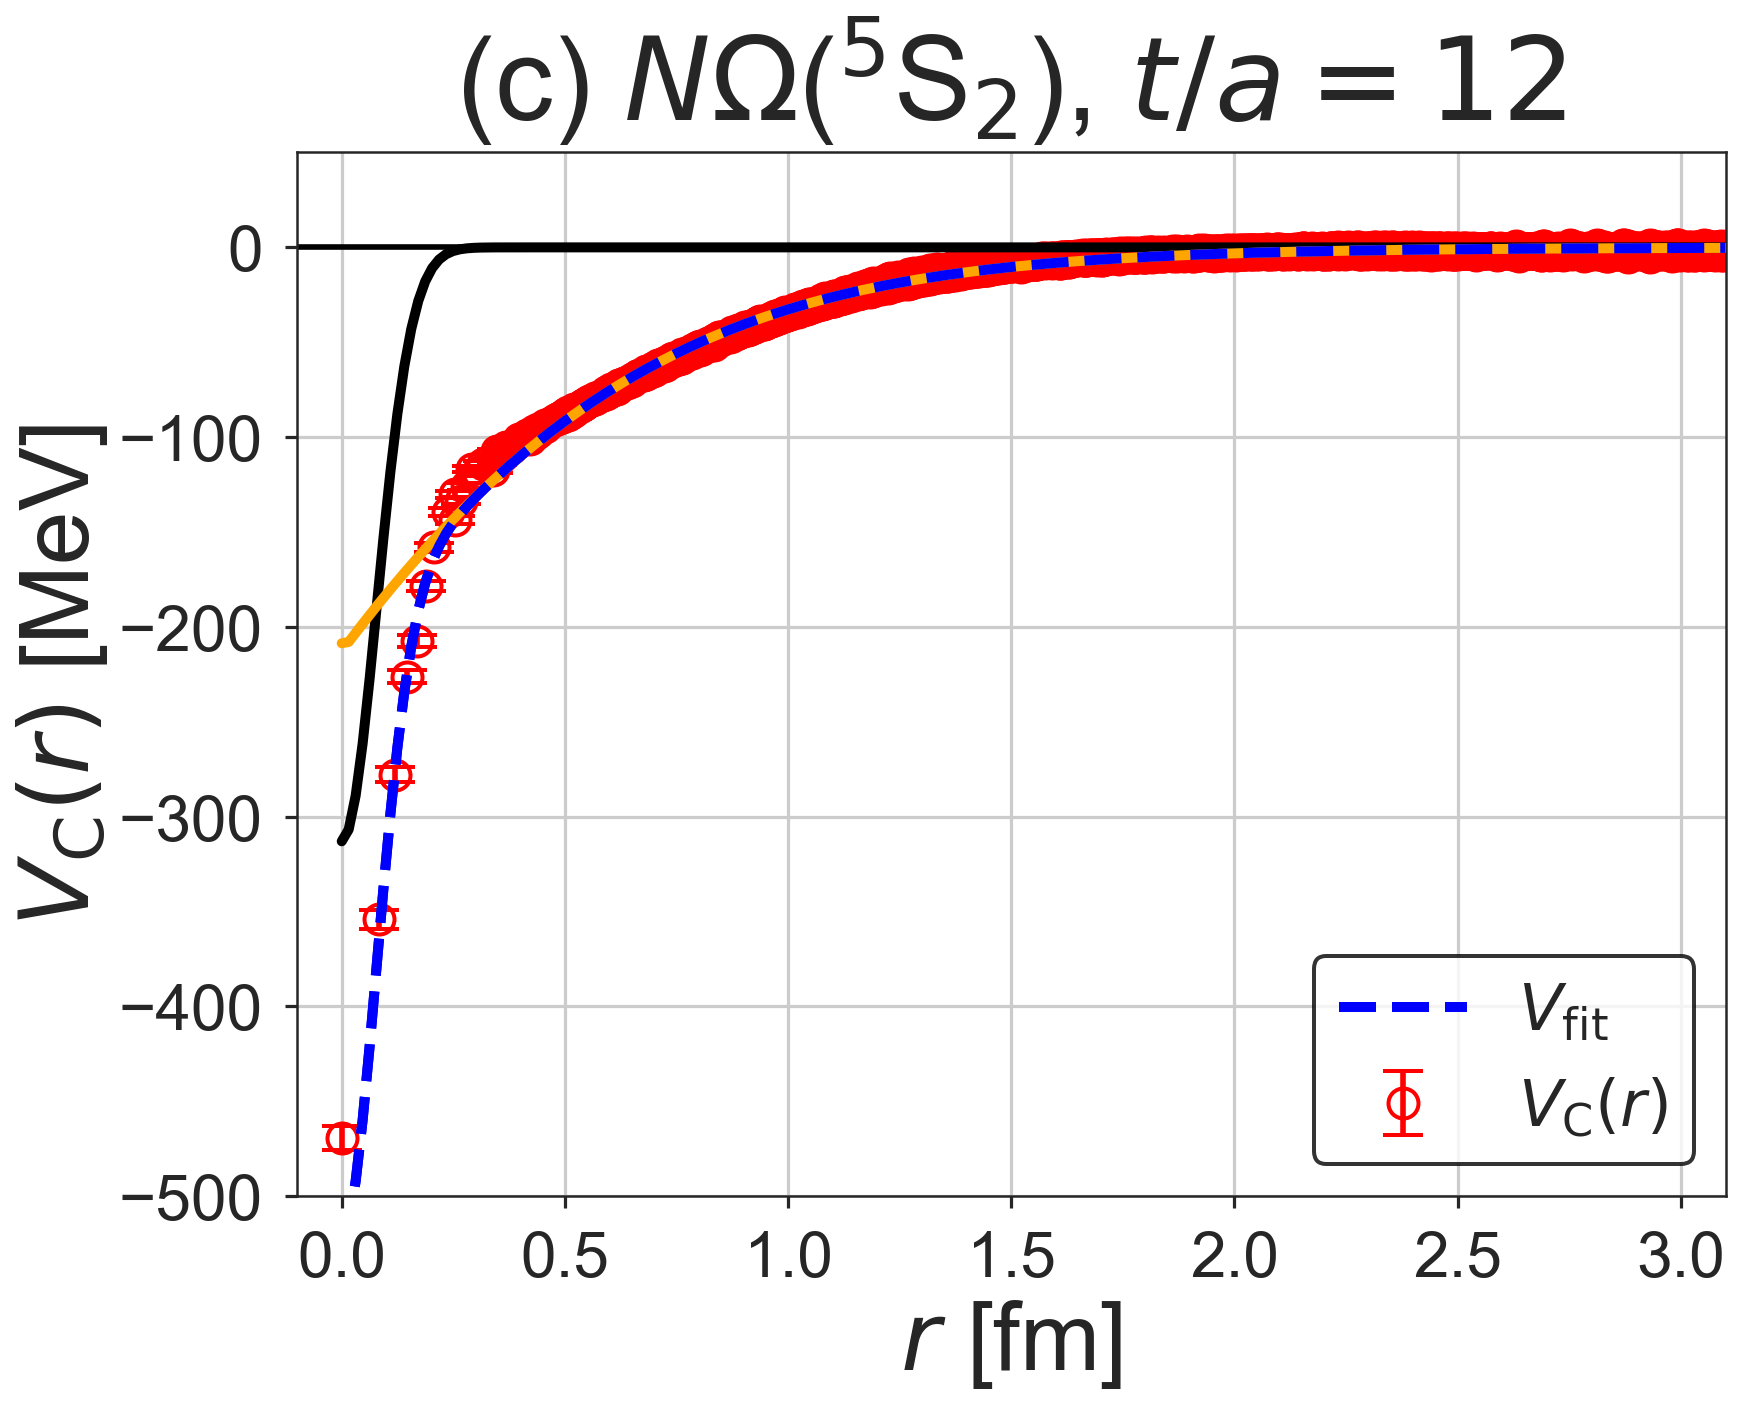

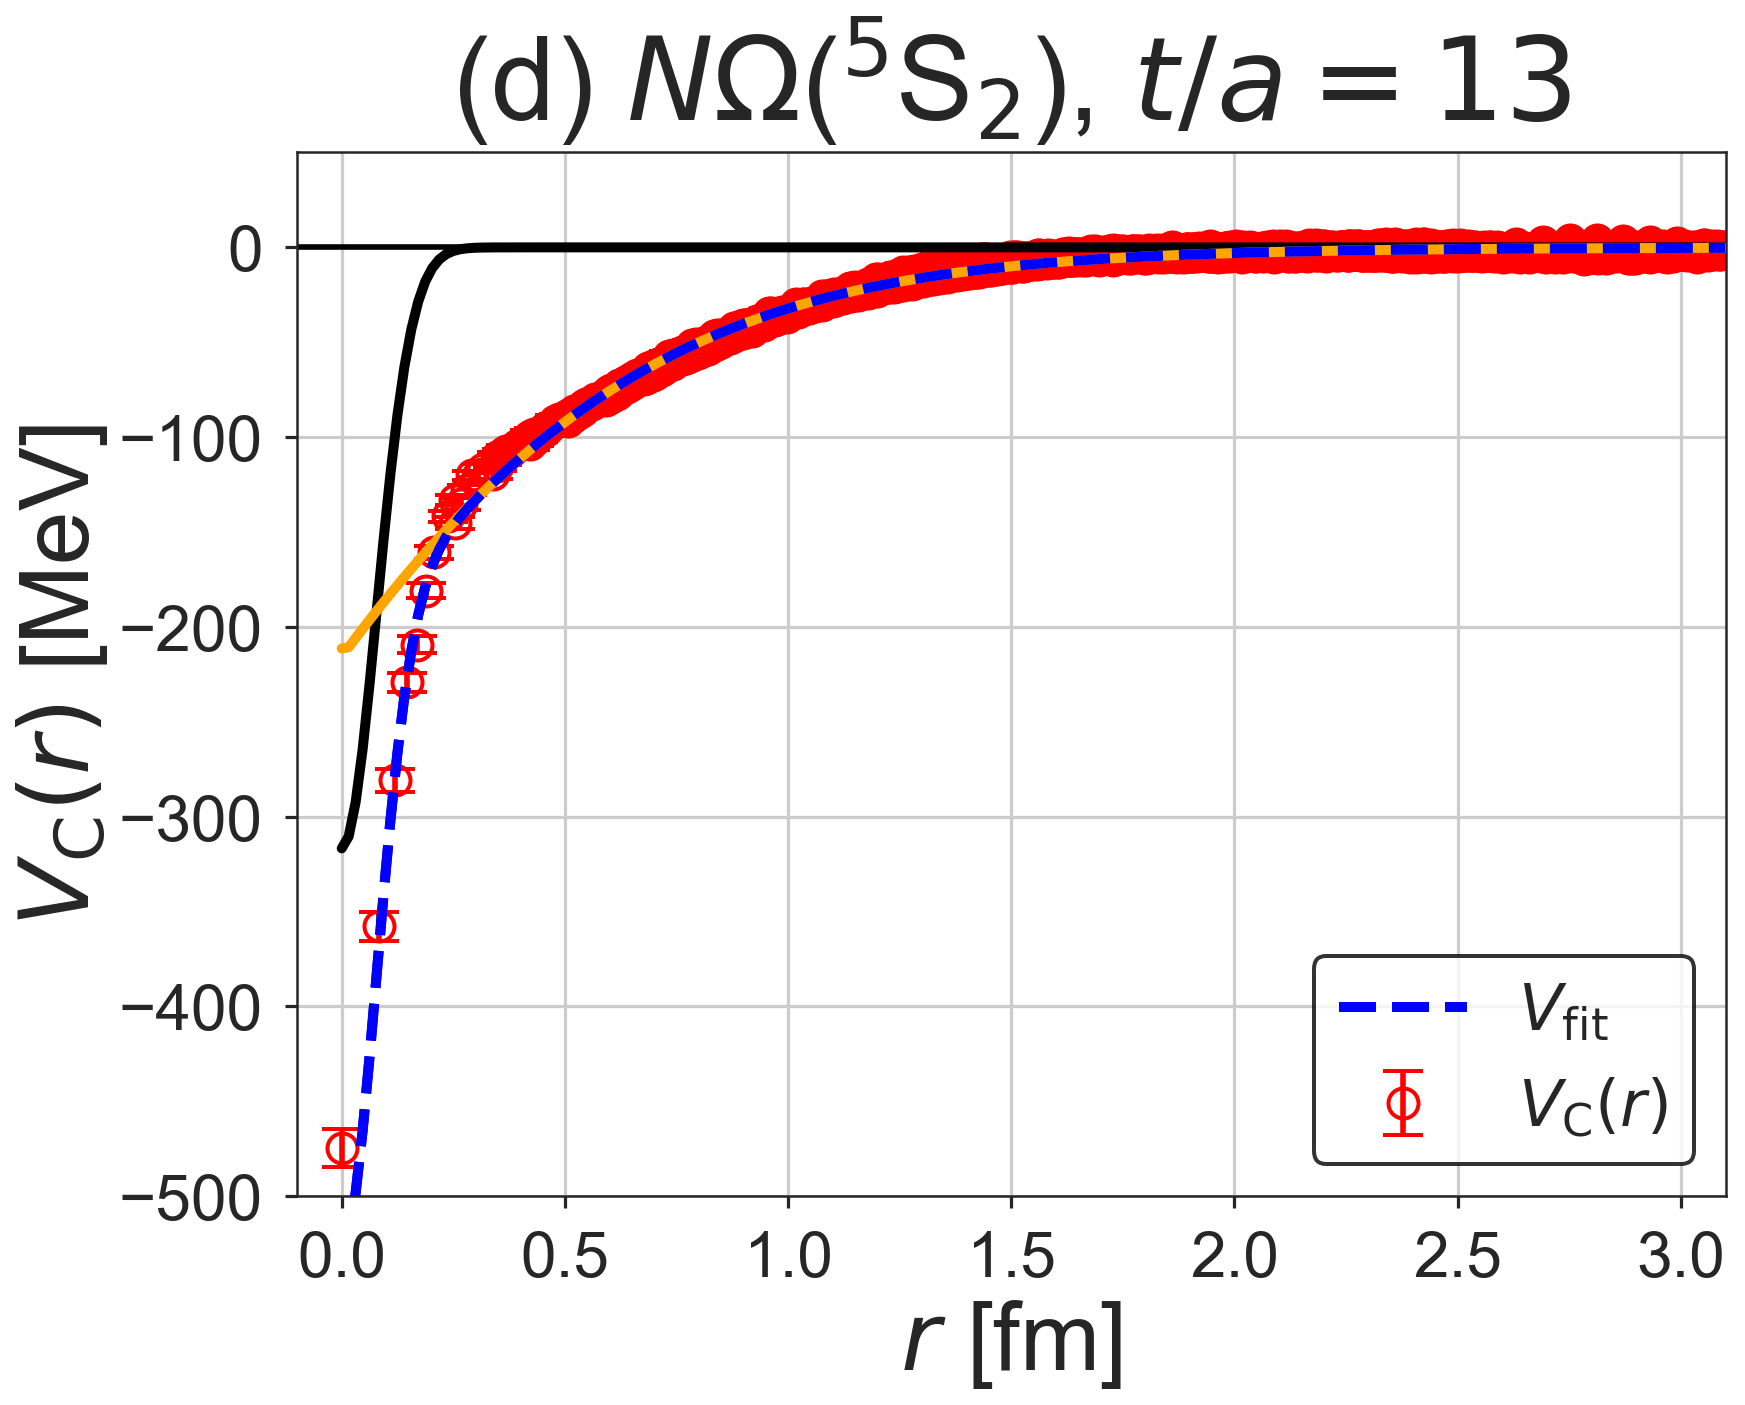

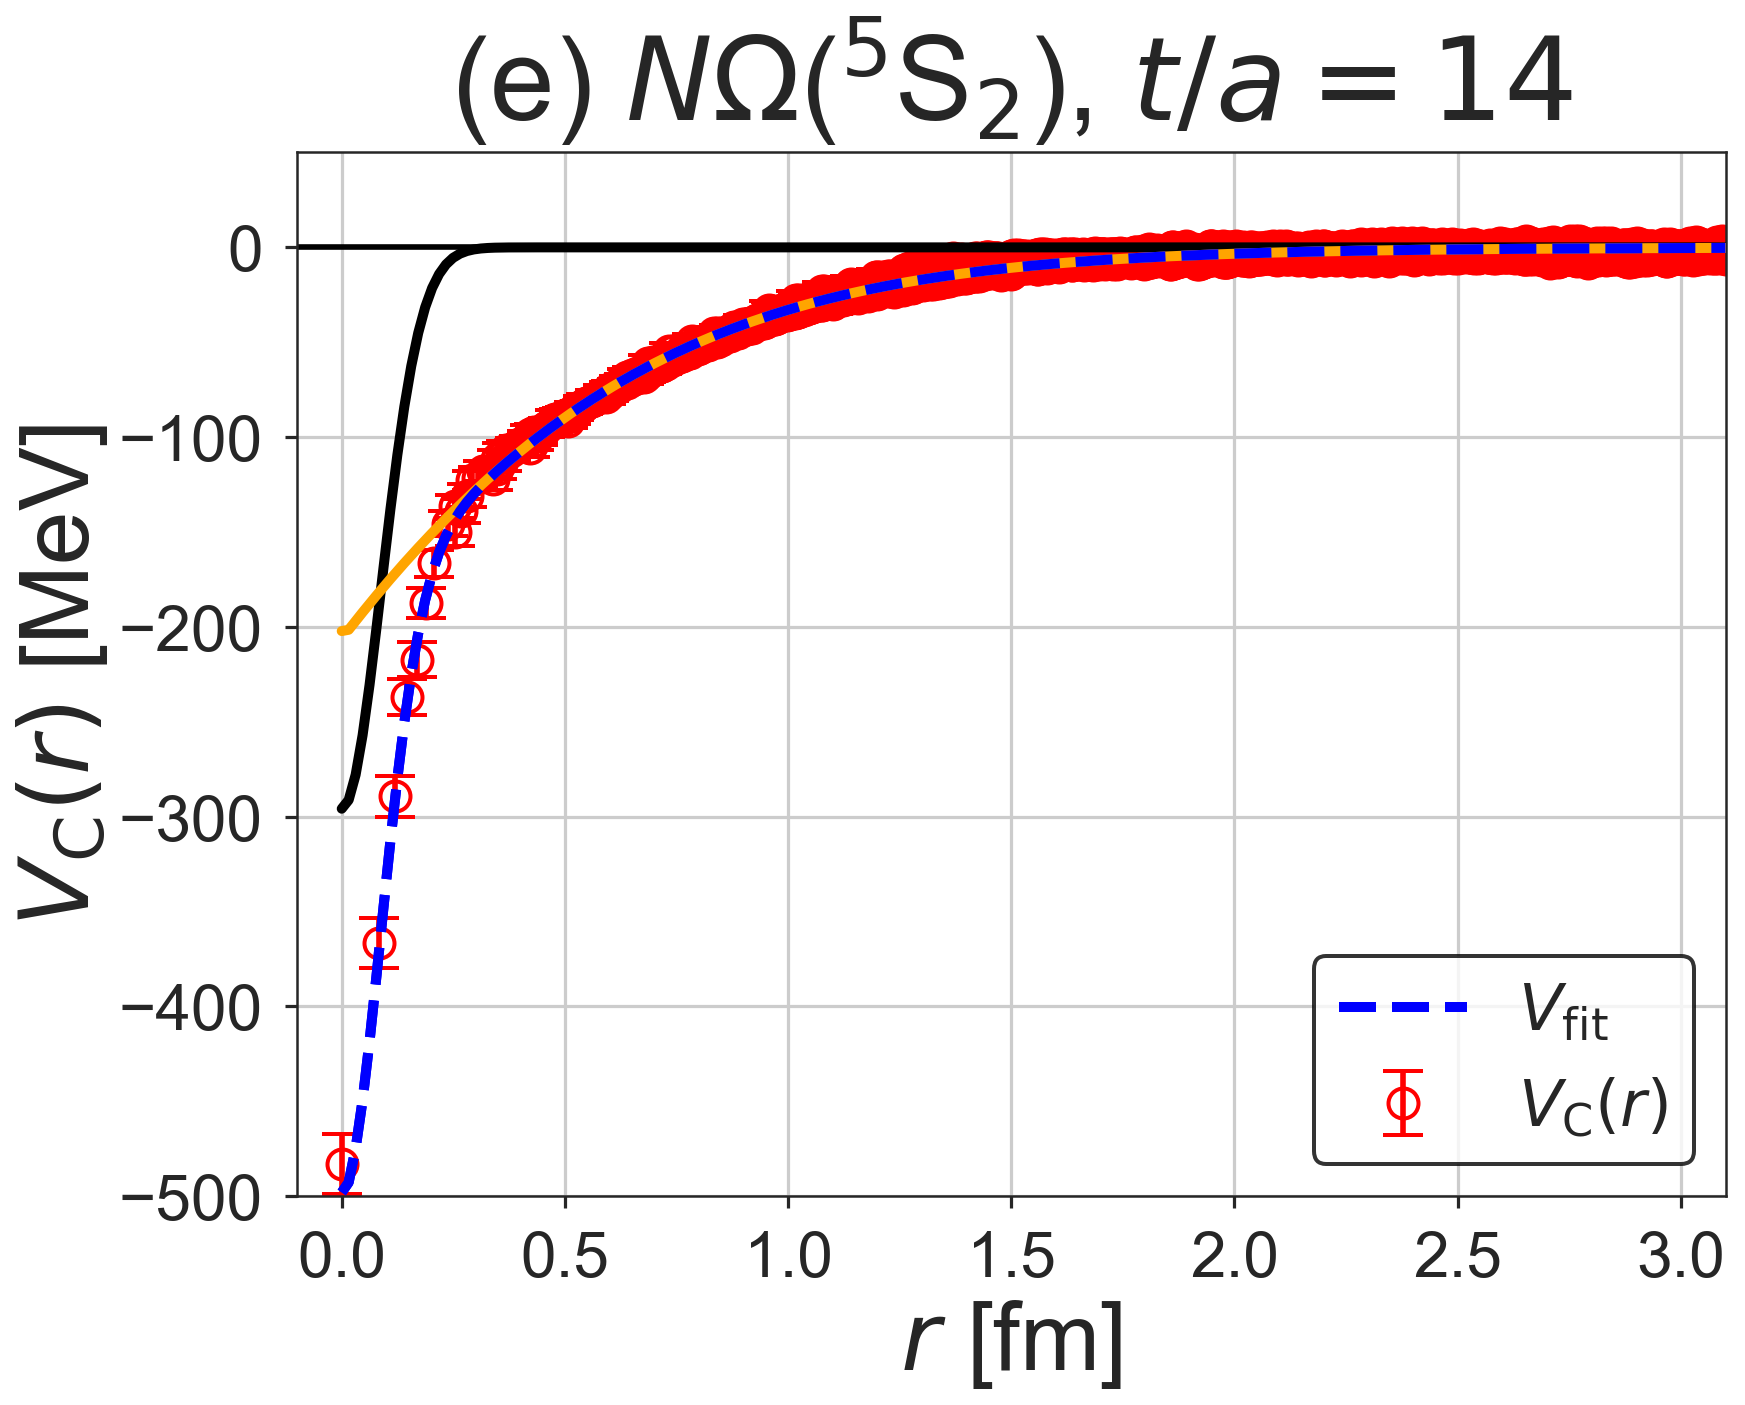

In [19]:
def fit_pot_with_jk(it, label):
    xs, ys, yerrs = pot_av[it][:,0], pot_av[it][:,7], pot_av[it][:,8]
    p0 = [-0.1, 0.5, -15, 5.0e-3]
    _prm, _, _ = pot_fit(xs, ys, yerrs, V_fit, p0)

    fig, ax = plt.subplots()
    vfit = lambda x: V_fit(_prm, x)
    plot_pot(it, ax, label, vfit)
    xls = np.linspace(1.0e-3, 3.10/lat_unit, 200)
    print(_prm)
    ax.plot(xls*lat_unit, V_fit([_prm[0], _prm[1], 0, 0], xls)*ainv, color='black', zorder=3, lw=5)
    ax.plot(xls*lat_unit, V_fit([0, 0, _prm[2], _prm[3]], xls)*ainv, color='orange', zorder=8, lw=5)
    ax.plot(xls*lat_unit, V_fit(_prm, xls)*ainv, color='blue', linestyle='--', label=r'$V_\mathrm{fit}$', zorder=8, lw=5)
# fit jackknife samples
    yerrs =  pot_jk[it].std(axis=0) * np.sqrt(bin_num - 1)
    prm_jk = []
    for ibin in tqdm(range(bin_num)):
        pfit, _, _ = pot_fit(rs, pot_jk[it][ibin,:], yerrs, V_fit, _prm)
        print(ibin, pfit)
        prm_jk.append(pfit)
        
    leg = ax.legend(frameon=True)
    leg.get_frame().set_edgecolor('black')
    leg.get_frame().set_linewidth(2.0)
    ax.set_ylim(-500, 50)
    
    fig.savefig(f'../figs/potential/pot_nomega_t{it:03d}_gauss_ff_yukawa2_fit.png',
               bbox_inches='tight')
    
    return _prm, np.array(prm_jk)

FF_yukawa2_prm_av = {}
FF_yukawa2_prm_jk = {}
for it, ll in zip([11, 12, 13, 14], ['(b)', '(c)', '(d)', '(e)']):
    FF_yukawa2_prm_av[it], FF_yukawa2_prm_jk[it] = fit_pot_with_jk(it, ll)

summary of fit parameters

In [20]:
for it in [11, 12, 13, 14]:
    print(f'# t = {it}')
    for ith, fac, uni in zip(range(4), [ainv, 1/(lat_unit**2), ainv*lat_unit**2, 1/(lat_unit**2)],
                            ['MeV', 'fm^{-2}', 'MeV fm^2', 'fm^{-2}']):
        tmp = ufloat(FF_yukawa2_prm_av[it][ith],
                    FF_yukawa2_prm_jk[it][:,ith].std() * np.sqrt(bin_num-1))
        print('{:3.2u} {}'.format(tmp*fac, uni))

# t = 11
-306.5+/-5.5 MeV
73.9+/-4.4 fm^{-2}
-266+/- 32 MeV fm^2
0.78+/-0.11 fm^{-2}
# t = 12
-313.0+/-5.3 MeV
81.7+/-5.4 fm^{-2}
-252+/- 27 MeV fm^2
0.85+/-0.10 fm^{-2}
# t = 13
-316.7+/-9.4 MeV
81.9+/-8.4 fm^{-2}
-237+/- 43 MeV fm^2
0.91+/-0.18 fm^{-2}
# t = 14
-296+/- 18 MeV
 64+/- 16 fm^{-2}
-2.7e+02+/-1.1e+02 MeV fm^2
0.76+/-0.34 fm^{-2}


## save parameters

In [21]:
mkdir -p  pkls

In [22]:
with open('pkls/FF_yukawa2_fit_result.pkl', 'wb') as fout:
    pickle.dump((FF_yukawa2_prm_av, FF_yukawa2_prm_jk),  fout)